dataloader.py

In [1]:
import torch
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pad_sequence
import pickle, pandas as pd

class IEMOCAPDataset(Dataset):

    def __init__(self, train=True):
        self.videoIDs, self.videoSpeakers, self.videoLabels, self.videoText,\
        self.videoAudio, self.videoVisual, self.videoSentence, self.trainVid,\
        self.testVid = pickle.load(open('/kaggle/input/iemocapdataset/IEMOCAP_features_raw.pkl', 'rb'), encoding='latin1')
        '''
        label index mapping = {'hap':0, 'sad':1, 'neu':2, 'ang':3, 'exc':4, 'fru':5}
        '''
        self.keys = [x for x in (self.trainVid if train else self.testVid)]

        self.len = len(self.keys)

    def __getitem__(self, index):
        vid = self.keys[index]
        return torch.FloatTensor(self.videoText[vid]),\
               torch.FloatTensor(self.videoVisual[vid]),\
               torch.FloatTensor(self.videoAudio[vid]),\
               torch.FloatTensor([[1,0] if x=='M' else [0,1] for x in\
                                  self.videoSpeakers[vid]]),\
               torch.FloatTensor([1]*len(self.videoLabels[vid])),\
               torch.LongTensor(self.videoLabels[vid]),\
               vid

    def __len__(self):
        return self.len

    def collate_fn(self, data):
        dat = pd.DataFrame(data)
        return [pad_sequence(dat[i]) if i<4 else pad_sequence(dat[i], True) if i<6 else dat[i].tolist() for i in dat]


class AVECDataset(Dataset):

    def __init__(self, path, train=True):
        self.videoIDs, self.videoSpeakers, self.videoLabels, self.videoText,\
            self.videoAudio, self.videoVisual, self.videoSentence,\
            self.trainVid, self.testVid = pickle.load(open(path, 'rb'),encoding='latin1')

        self.keys = [x for x in (self.trainVid if train else self.testVid)]

        self.len = len(self.keys)

    def __getitem__(self, index):
        vid = self.keys[index]
        return torch.FloatTensor(self.videoText[vid]),\
               torch.FloatTensor(self.videoVisual[vid]),\
               torch.FloatTensor(self.videoAudio[vid]),\
               torch.FloatTensor([[1,0] if x=='user' else [0,1] for x in\
                                  self.videoSpeakers[vid]]),\
               torch.FloatTensor([1]*len(self.videoLabels[vid])),\
               torch.FloatTensor(self.videoLabels[vid])

    def __len__(self):
        return self.len

    def collate_fn(self, data):
        dat = pd.DataFrame(data)
        return [pad_sequence(dat[i]) if i<4 else pad_sequence(dat[i], True) for i in dat]


# class MELDDataset(Dataset):

#     def __init__(self, path, classify, train=True):
#         self.videoIDs, self.videoSpeakers, self.videoLabelsEmotion, self.videoText,\
#         self.videoAudio, self.videoSentence, self.trainVid,\
#         self.testVid, self.videoLabelsSentiment = pickle.load(open(path, 'rb'))

#         if classify == 'emotion':
#             self.videoLabels = self.videoLabelsEmotion
#         else:
#             self.videoLabels = self.videoLabelsSentiment
#         '''
#         label index mapping = {'neutral': 0, 'surprise': 1, 'fear': 2, 'sadness': 3, 'joy': 4, 'disgust': 5, 'anger':6}
#         '''
#         self.keys = [x for x in (self.trainVid if train else self.testVid)]

#         self.len = len(self.keys)

#     def __getitem__(self, index):
#         vid = self.keys[index]
#         return torch.FloatTensor(self.videoText[vid]),\
#                torch.FloatTensor(self.videoAudio[vid]),\
#                torch.FloatTensor(self.videoSpeakers[vid]),\
#                torch.FloatTensor([1]*len(self.videoLabels[vid])),\
#                torch.LongTensor(self.videoLabels[vid]),\
#                vid

#     def __len__(self):
#         return self.len

#     def collate_fn(self, data):
#         dat = pd.DataFrame(data)
#         return [pad_sequence(dat[i]) if i<3 else pad_sequence(dat[i], True) if i<5 else dat[i].tolist() for i in dat]
class MELDDataset(Dataset):

    def __init__(self, path, n_classes, train=True):
        if n_classes == 3:
            self.videoIDs, self.videoSpeakers, _, self.videoText,\
            self.videoAudio, self.videoSentence, self.trainVid,\
            self.testVid, self.videoLabels = pickle.load(open(path, 'rb'))
        elif n_classes == 7:
            self.videoIDs, self.videoSpeakers, self.videoLabels, self.videoText,\
            self.videoAudio, self.videoSentence, self.trainVid,\
            self.testVid, _ = pickle.load(open(path, 'rb'))
        '''
        label index mapping = {'neutral': 0, 'surprise': 1, 'fear': 2, 'sadness': 3, 'joy': 4, 'disgust': 5, 'anger':6}
        '''
        self.keys = [x for x in (self.trainVid if train else self.testVid)]

        self.len = len(self.keys)

    def __getitem__(self, index):
        vid = self.keys[index]
        return torch.FloatTensor(self.videoText[vid]),\
               torch.FloatTensor(self.videoAudio[vid]),\
               torch.FloatTensor(self.videoSpeakers[vid]),\
               torch.FloatTensor([1]*len(self.videoLabels[vid])),\
               torch.LongTensor(self.videoLabels[vid]),\
               vid

    def __len__(self):
        return self.len

    def collate_fn(self, data):
        dat = pd.DataFrame(data)
        return [pad_sequence(dat[i]) if i<3 else pad_sequence(dat[i], True) if i<5 else dat[i].tolist() for i in dat]

class DailyDialogueDataset(Dataset):

    def __init__(self, split, path):
        
        self.Speakers, self.Features, \
        self.ActLabels, self.EmotionLabels, self.trainId, self.testId, self.validId = pickle.load(open(path, 'rb'))
        
        if split == 'train':
            self.keys = [x for x in self.trainId]
        elif split == 'test':
            self.keys = [x for x in self.testId]
        elif split == 'valid':
            self.keys = [x for x in self.validId]

        self.len = len(self.keys)

    def __getitem__(self, index):
        conv = self.keys[index]
        
        return  torch.FloatTensor(self.Features[conv]), \
                torch.FloatTensor([[1,0] if x=='0' else [0,1] for x in self.Speakers[conv]]),\
                torch.FloatTensor([1]*len(self.EmotionLabels[conv])), \
                torch.LongTensor(self.EmotionLabels[conv]), \
                conv

    def __len__(self):
        return self.len
    
    def collate_fn(self, data):
        dat = pd.DataFrame(data)
        return [pad_sequence(dat[i]) if i<2 else pad_sequence(dat[i], True) if i<4 else dat[i].tolist() for i in dat]


class DailyDialogueDataset2(Dataset):

    def __init__(self, split, path):

        self.Speakers, self.Features, _, \
        self.ActLabels, self.EmotionLabels, self.trainId, self.testId, self.validId = pickle.load(open(path, 'rb'))

        if split == 'train':
            self.keys = [x for x in self.trainId]
        elif split == 'test':
            self.keys = [x for x in self.testId]
        elif split == 'valid':
            self.keys = [x for x in self.validId]

        self.len = len(self.keys)

    def __getitem__(self, index):
        conv = self.keys[index]

        return torch.FloatTensor(self.Features[conv]), \
               torch.FloatTensor([[1, 0] if x == '0' else [0, 1] for x in self.Speakers[conv]]), \
               torch.FloatTensor([1] * len(self.EmotionLabels[conv])), \
               torch.LongTensor(self.EmotionLabels[conv]), \
               conv

    def __len__(self):
        return self.len

    def collate_fn(self, data):
        dat = pd.DataFrame(data)
        return [pad_sequence(dat[i]) if i < 2 else pad_sequence(dat[i], True) if i < 4 else dat[i].tolist() for i in
                dat]
  

dailydailogue_preprocessing.py

In [2]:
import pandas as pd, numpy as np, pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def preprocess_text(x):
    for punct in '"!&?.,}-/<>#$%\()*+:;=?@[\\]^_`|\~':
        x = x.replace(punct, ' ')

    x = ' '.join(x.split())
    x = x.lower()

    return x


def create_utterances(filename, split):
    sentences, act_labels, emotion_labels, speakers, conv_id, utt_id = [], [], [], [], [], []

    lengths = []
    with open(filename, 'r') as f:
        for c_id, line in enumerate(f):
            s = eval(line)
            for u_id, item in enumerate(s['dialogue']):
                sentences.append(item['text'])
                act_labels.append(item['act'])
                emotion_labels.append(item['emotion'])
                conv_id.append(split[:2] + '_c' + str(c_id))
                utt_id.append(split[:2] + '_c' + str(c_id) + '_u' + str(u_id))
                speakers.append(str(u_id % 2))

                # u_id += 1

    data = pd.DataFrame(sentences, columns=['sentence'])
    data['sentence'] = data['sentence'].apply(lambda x: preprocess_text(x))
    data['act_label'] = act_labels
    data['emotion_label'] = emotion_labels
    data['speaker'] = speakers
    data['conv_id'] = conv_id
    data['utt_id'] = utt_id

    return data


def load_pretrained_glove():
    print("Loading GloVe model, this can take some time...")
    glv_vector = {}
    # Put your glove embedding path here
    f = open('/kaggle/input/glovewordembedding/glove.840B.300d.txt', encoding='utf-8')

    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float')
            glv_vector[word] = coefs
        except ValueError:
            continue
    f.close()
    print("Completed loading pretrained GloVe model.")
    return glv_vector


def encode_labels(encoder, l):
    return encoder[l]


if __name__ == '__main__':
    # Your training data path
    # Data format is consistent with DialogueRNN
    train_data = create_utterances('/kaggle/input/dailydialoguedataset/train.json', 'train')
    valid_data = create_utterances('/kaggle/input/dailydialoguedataset/valid.json', 'valid')
    test_data = create_utterances('/kaggle/input/dailydialoguedataset/test.json', 'test')

    ## encode the emotion and dialog act labels ##
    all_act_labels, all_emotion_labels = set(train_data['act_label']), set(train_data['emotion_label'])
    act_label_encoder, emotion_label_encoder, act_label_decoder, emotion_label_decoder = {}, {}, {}, {}

    for i, label in enumerate(all_act_labels):
        act_label_encoder[label] = i
        act_label_decoder[i] = label

    # Here To print the label mapping
    # This is very import for your own dataset and also for reproduce the paper result
    # Convert set to list for indexing
    all_emotion_list = list(all_emotion_labels)
    for i, label in enumerate(all_emotion_labels):
        emotion_label_encoder[label] = i
        print(str(i) + " " + str(label))
        emotion_label_decoder[i] = label
        print(str(emotion_label_encoder[label]) + " " + str(emotion_label_decoder[i]))

    pickle.dump(act_label_encoder, open('/kaggle/working/act_label_encoder.pkl', 'wb'))
    pickle.dump(act_label_decoder, open('/kaggle/working/act_label_decoder.pkl', 'wb'))
    pickle.dump(emotion_label_encoder, open('/kaggle/working/emotion_label_encoder.pkl', 'wb'))
    pickle.dump(emotion_label_decoder, open('/kaggle/working/emotion_label_decoder.pkl', 'wb'))

    train_data['encoded_act_label'] = train_data['act_label'].map(lambda x: encode_labels(act_label_encoder, x))
    test_data['encoded_act_label'] = test_data['act_label'].map(lambda x: encode_labels(act_label_encoder, x))
    valid_data['encoded_act_label'] = valid_data['act_label'].map(lambda x: encode_labels(act_label_encoder, x))

    train_data['encoded_emotion_label'] = train_data['emotion_label'].map(
        lambda x: encode_labels(emotion_label_encoder, x))
    test_data['encoded_emotion_label'] = test_data['emotion_label'].map(
        lambda x: encode_labels(emotion_label_encoder, x))
    valid_data['encoded_emotion_label'] = valid_data['emotion_label'].map(
        lambda x: encode_labels(emotion_label_encoder, x))

    ## tokenize all sentences ##
    all_text = list(train_data['sentence'])
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(all_text)
    pickle.dump(tokenizer, open('/kaggle/working/tokenizer.pkl', 'wb'))

    ## convert the sentences into sequences ##
    train_sequence = tokenizer.texts_to_sequences(list(train_data['sentence']))
    valid_sequence = tokenizer.texts_to_sequences(list(valid_data['sentence']))
    test_sequence = tokenizer.texts_to_sequences(list(test_data['sentence']))

    train_data['sentence_length'] = [len(item) for item in train_sequence]
    valid_data['sentence_length'] = [len(item) for item in valid_sequence]
    test_data['sentence_length'] = [len(item) for item in test_sequence]

    max_num_tokens = 250

    train_sequence = pad_sequences(train_sequence, maxlen=max_num_tokens, padding='post')
    valid_sequence = pad_sequences(valid_sequence, maxlen=max_num_tokens, padding='post')
    test_sequence = pad_sequences(test_sequence, maxlen=max_num_tokens, padding='post')

    train_data['sequence'] = list(train_sequence)
    valid_data['sequence'] = list(valid_sequence)
    test_data['sequence'] = list(test_sequence)

    ## save the data in pickle format ##
    convSpeakers, convInputSequence, convInputMaxSequenceLength, convActLabels, convEmotionLabels = {}, {}, {}, {}, {}
    train_conv_ids, test_conv_ids, valid_conv_ids = set(train_data['conv_id']), set(test_data['conv_id']), set(
        valid_data['conv_id'])
    all_data = pd.concat([train_data, test_data, valid_data], ignore_index=True)


    print('Preparing dataset. Hang on...')
    for item in list(train_conv_ids) + list(test_conv_ids) + list(valid_conv_ids):
        df = all_data[all_data['conv_id'] == item]

        convSpeakers[item] = list(df['speaker'])
        convInputSequence[item] = list(df['sequence'])
        convInputMaxSequenceLength[item] = max(list(df['sentence_length']))
        convActLabels[item] = list(df['encoded_act_label'])
        convEmotionLabels[item] = list(df['encoded_emotion_label'])

    pickle.dump([convSpeakers, convInputSequence, convInputMaxSequenceLength, convActLabels, convEmotionLabels,
                 train_conv_ids, test_conv_ids, valid_conv_ids], open('/kaggle/working/daily_dialogue2.pkl', 'wb'))

    ## save pretrained embedding matrix ##
    glv_vector = load_pretrained_glove()
    word_vector_length = len(glv_vector['the'])
    word_index = tokenizer.word_index
    inv_word_index = {v: k for k, v in word_index.items()}
    num_unique_words = len(word_index)
    glv_embedding_matrix = np.zeros((num_unique_words + 1, word_vector_length))

    for j in range(1, num_unique_words + 1):
        try:
            glv_embedding_matrix[j] = glv_vector[inv_word_index[j]]
        except KeyError:
            glv_embedding_matrix[j] = np.random.randn(word_vector_length) / 200

    np.ndarray.dump(glv_embedding_matrix, open('/kaggle/working/glv_embedding_matrix', 'wb'))
    print('Done. Completed preprocessing.')

2024-04-22 13:09:28.974841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 13:09:28.974957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 13:09:29.117319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


0 disgust
0 disgust
1 happiness
1 happiness
2 sadness
2 sadness
3 no_emotion
3 no_emotion
4 fear
4 fear
5 anger
5 anger
6 surprise
6 surprise
Preparing dataset. Hang on...
Loading GloVe model, this can take some time...
Completed loading pretrained GloVe model.
Done. Completed preprocessing.


In [3]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


model.py

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.utils.rnn import pad_sequence
from torch_geometric.nn import RGCNConv, GraphConv
import numpy as np, itertools, random, copy, math

# For methods and models related to DialogueGCN jump to line 516

class MaskedNLLLoss(nn.Module):

    def __init__(self, weight=None):
        super(MaskedNLLLoss, self).__init__()
        self.weight = weight
        self.loss = nn.NLLLoss(weight=weight,
                               reduction='sum')

    def forward(self, pred, target, mask):
        """
        pred -> batch*seq_len, n_classes
        target -> batch*seq_len
        mask -> batch, seq_len
        """
        mask_ = mask.view(-1,1) # batch*seq_len, 1
        if type(self.weight)==type(None):
            loss = self.loss(pred*mask_, target)/torch.sum(mask)
        else:
            loss = self.loss(pred*mask_, target)\
                            /torch.sum(self.weight[target]*mask_.squeeze())
        return loss


class MaskedMSELoss(nn.Module):

    def __init__(self):
        super(MaskedMSELoss, self).__init__()
        self.loss = nn.MSELoss(reduction='sum')

    def forward(self, pred, target, mask):
        """
        pred -> batch*seq_len
        target -> batch*seq_len
        mask -> batch*seq_len
        """
        loss = self.loss(pred*mask, target)/torch.sum(mask)
        return loss


class UnMaskedWeightedNLLLoss(nn.Module):

    def __init__(self, weight=None):
        super(UnMaskedWeightedNLLLoss, self).__init__()
        self.weight = weight
        self.loss = nn.NLLLoss(weight=weight,
                               reduction='sum')

    def forward(self, pred, target):
        """
        pred -> batch*seq_len, n_classes
        target -> batch*seq_len
        """
        if type(self.weight)==type(None):
            loss = self.loss(pred, target)
        else:
            loss = self.loss(pred, target)\
                            /torch.sum(self.weight[target])
        return loss


class SimpleAttention(nn.Module):

    def __init__(self, input_dim):
        super(SimpleAttention, self).__init__()
        self.input_dim = input_dim
        self.scalar = nn.Linear(self.input_dim,1,bias=False)
        
    def forward(self, M, x=None):
        """
        M -> (seq_len, batch, vector)
        x -> dummy argument for the compatibility with MatchingAttention
        """
        scale = self.scalar(M) # seq_len, batch, 1
        alpha = F.softmax(scale, dim=0).permute(1,2,0) # batch, 1, seq_len
        attn_pool = torch.bmm(alpha, M.transpose(0,1))[:,0,:] # batch, vector
        return attn_pool, alpha


# class MatchingAttention(nn.Module):

#     def __init__(self, mem_dim, cand_dim, alpha_dim=None, att_type='general'):
#         super(MatchingAttention, self).__init__()
#         assert att_type!='concat' or alpha_dim!=None
#         assert att_type!='dot' or mem_dim==cand_dim
#         self.mem_dim = mem_dim
#         self.cand_dim = cand_dim
#         self.att_type = att_type
#         if att_type=='general':
#             self.transform = nn.Linear(cand_dim, mem_dim, bias=False)
#         if att_type=='general2':
#             self.transform = nn.Linear(cand_dim, mem_dim, bias=True)
#             #torch.nn.init.normal_(self.transform.weight,std=0.01)
#         elif att_type=='concat':
#             self.transform = nn.Linear(cand_dim+mem_dim, alpha_dim, bias=False)
#             self.vector_prod = nn.Linear(alpha_dim, 1, bias=False)

#     def forward(self, M, x, mask=None):
#         """
#         M -> (seq_len, batch, mem_dim)
#         x -> (batch, cand_dim)
#         mask -> (batch, seq_len)
#         """
#         if type(mask)==type(None):
#             mask = torch.ones(M.size(1), M.size(0)).type(M.type())

#         if self.att_type=='dot':
#             # vector = cand_dim = mem_dim
#             M_ = M.permute(1,2,0) # batch, vector, seqlen
#             x_ = x.unsqueeze(1) # batch, 1, vector
#             alpha = F.softmax(torch.bmm(x_, M_), dim=2) # batch, 1, seqlen
#         elif self.att_type=='general':
#             M_ = M.permute(1,2,0) # batch, mem_dim, seqlen
#             x_ = self.transform(x).unsqueeze(1) # batch, 1, mem_dim
#             alpha = F.softmax(torch.bmm(x_, M_), dim=2) # batch, 1, seqlen
#         elif self.att_type=='general2':
#             M_ = M.permute(1,2,0) # batch, mem_dim, seqlen
#             x_ = self.transform(x).unsqueeze(1) # batch, 1, mem_dim
#             mask_ = mask.unsqueeze(2).repeat(1, 1, self.mem_dim).transpose(1, 2) # batch, seq_len, mem_dim
#             M_ = M_ * mask_
#             alpha_ = torch.bmm(x_, M_)*mask.unsqueeze(1)
#             alpha_ = torch.tanh(alpha_)
#             alpha_ = F.softmax(alpha_, dim=2)
#             # alpha_ = F.softmax((torch.bmm(x_, M_))*mask.unsqueeze(1), dim=2) # batch, 1, seqlen
#             alpha_masked = alpha_*mask.unsqueeze(1) # batch, 1, seqlen
#             alpha_sum = torch.sum(alpha_masked, dim=2, keepdim=True) # batch, 1, 1
#             alpha = alpha_masked/alpha_sum # batch, 1, 1 ; normalized
#             #import ipdb;ipdb.set_trace()
#         else:
#             M_ = M.transpose(0,1) # batch, seqlen, mem_dim
#             x_ = x.unsqueeze(1).expand(-1,M.size()[0],-1) # batch, seqlen, cand_dim
#             M_x_ = torch.cat([M_,x_],2) # batch, seqlen, mem_dim+cand_dim
#             mx_a = F.tanh(self.transform(M_x_)) # batch, seqlen, alpha_dim
#             alpha = F.softmax(self.vector_prod(mx_a),1).transpose(1,2) # batch, 1, seqlen

#         attn_pool = torch.bmm(alpha, M.transpose(0,1))[:,0,:] # batch, mem_dim
#         return attn_pool, alpha


    
    
    
# class GATLayer(nn.Module):
#     def __init__(self, in_features, out_features, dropout, alpha):
#         super(GATLayer, self).__init__()
#         self.dropout = dropout
#         self.alpha = alpha
#         self.W = nn.Linear(in_features, out_features, bias=False)
#         self.a = nn.Linear(2 * out_features, 1, bias=False)

#     def forward(self, input, adj):
#         h = self.W(input)
#         N = h.size(0)
#         a_input = torch.cat([h.repeat(1, N).view(N * N, -1), h.repeat(N, 1)], dim=1).view(N, -1, 2 * self.out_features)
#         e = F.leaky_relu(self.a(a_input).squeeze(2), negative_slope=self.alpha)
#         zero_vec = -9e15 * torch.ones_like(e)
#         attention = torch.where(adj > 0, e, zero_vec)
#         attention = F.softmax(attention, dim=1)
#         attention = F.dropout(attention, self.dropout, training=self.training)
#         h_prime = torch.matmul(attention, h)
#         return F.elu(h_prime)

# class GATMatchingAttention(nn.Module):
#     def __init__(self, mem_dim, cand_dim, num_heads, dropout, alpha, att_type='general2'):
#         super(GATMatchingAttention, self).__init__()
#         self.gat_layers = nn.ModuleList([
#             GATLayer(mem_dim, mem_dim, dropout=dropout, alpha=alpha) for _ in range(num_heads)
#         ])
#         self.attention = MatchingAttention(mem_dim, cand_dim, att_type=att_type)
        
#     def forward(self, M, x, mask=None):
#         for gat_layer in self.gat_layers:
#             M = gat_layer(M, mask)
#         attn_pool, alpha = self.attention(M, x, mask)
#         print("im working")
#         return attn_pool, alpha   


import torch
import torch.nn as nn
import torch.nn.functional as F

class MatchingAttention(nn.Module):
    def __init__(self, mem_dim, cand_dim, alpha_dim=None, att_type='gat'):
        super(MatchingAttention, self).__init__()
        assert att_type != 'concat' or alpha_dim is not None
        assert att_type != 'dot' or mem_dim == cand_dim
        self.mem_dim = mem_dim
        self.cand_dim = cand_dim
        self.att_type = att_type
        
        if att_type == 'general':
            self.transform = nn.Linear(cand_dim, mem_dim, bias=False)
        elif att_type == 'general2':
            self.transform = nn.Linear(cand_dim, mem_dim, bias=True)
        elif att_type == 'concat':
            self.transform = nn.Linear(cand_dim + mem_dim, alpha_dim, bias=False)
            self.vector_prod = nn.Linear(alpha_dim, 1, bias=False)
        elif att_type == 'gat':  # GAT implementation
            self.W = nn.Linear(mem_dim, mem_dim // 2, bias=False)
            self.a = nn.Linear(2 * (mem_dim // 2), 1, bias=False)

    def forward(self, M, x, mask=None):
        if mask is None:
            mask = torch.ones(M.size(1), M.size(0)).type(M.type())

        if self.att_type == 'dot':
            M_ = M.permute(1, 2, 0)
            x_ = x.unsqueeze(1)
            alpha = F.softmax(torch.bmm(x_, M_), dim=2)
        elif self.att_type == 'general':
            M_ = M.permute(1, 2, 0)
            x_ = self.transform(x).unsqueeze(1)
            alpha = F.softmax(torch.bmm(x_, M_), dim=2)
        elif self.att_type == 'general2':
            M_ = M.permute(1, 2, 0)
            x_ = self.transform(x).unsqueeze(1)
            mask_ = mask.unsqueeze(2).repeat(1, 1, self.mem_dim).transpose(1, 2)
            M_ = M_ * mask_
            alpha_ = torch.bmm(x_, M_) * mask.unsqueeze(1)
            alpha_ = torch.tanh(alpha_)
            alpha_ = F.softmax(alpha_, dim=2)
            alpha_masked = alpha_ * mask.unsqueeze(1)
            alpha_sum = torch.sum(alpha_masked, dim=2, keepdim=True)
            alpha = alpha_masked / alpha_sum
        elif self.att_type == 'gat':  # GAT implementation
            batch_size = M.size(1)
            seq_len = M.size(0)

            Wh = self.W(M)
            Wh = Wh.permute(1, 0, 2)
            a_input = torch.cat([Wh.unsqueeze(2).expand(-1, -1, seq_len, -1), Wh.unsqueeze(1).expand(-1, seq_len, -1, -1)], dim=3)
            e = F.leaky_relu(self.a(a_input).squeeze(3), negative_slope=0.2)
            zero_vec = -9e15 * torch.ones_like(e)
            attention = torch.where(mask.unsqueeze(1).expand(-1, seq_len, -1) > 0, e, zero_vec)
#             print(attention.shape)
            alpha = F.softmax(attention, dim=2)
        else:
            M_ = M.transpose(0, 1)
            x_ = x.unsqueeze(1).expand(-1, M.size()[0], -1)
            M_x_ = torch.cat([M_, x_], 2)
            mx_a = F.tanh(self.transform(M_x_))
            alpha = F.softmax(self.vector_prod(mx_a), 1).transpose(1, 2)

        attn_pool = torch.bmm(alpha, M.transpose(0, 1))[:, 0, :]
        return attn_pool, alpha





# class GATLayer(nn.Module):
#     def __init__(self, in_features, out_features, dropout, alpha):
#         super(GATLayer, self).__init__()
#         self.dropout = dropout
#         self.alpha = alpha
#         self.W = nn.Linear(in_features, out_features, bias=False)
#         self.a = nn.Linear(2 * out_features, 1, bias=False)

#     def forward(self, input, adj):
#         h = self.W(input)
#         N = h.size(0)
#         if h.dim() == 2:
#             h = h.unsqueeze(0).expand(N, -1, -1)  # Add a batch dimension if it's missing
#         h_row = h.unsqueeze(1).expand(N, N, -1, -1)  # Repeat along rows
#         h_col = h.unsqueeze(0).expand(N, N, -1, -1)  # Repeat along columns
#         a_input = torch.cat([h_row, h_col], dim=-1)  # Concatenate along the last dimension
#         e = F.leaky_relu(self.a(a_input).squeeze(3), negative_slope=self.alpha)
#         zero_vec = -9e15 * torch.ones_like(e)
#         attention = torch.where(adj > 0, e, zero_vec)
#         attention = F.softmax(attention, dim=1)
#         attention = F.dropout(attention, self.dropout, training=self.training)
#         h_prime = torch.matmul(attention, h)
#         return F.elu(h_prime), attention






# class GATMatchingAttention(nn.Module):
#     def __init__(self, mem_dim, num_heads, dropout, alpha):
#         super(GATMatchingAttention, self).__init__()
#         self.gat_layers = nn.ModuleList([
#             GATLayer(mem_dim, mem_dim, dropout=dropout, alpha=alpha) for _ in range(num_heads)
#         ])

#     def forward(self, M,x, mask=None):
#         for gat_layer in self.gat_layers:
#             M, alpha = gat_layer(M, mask)
#         attn_pool = M.mean(dim=1)  # Average pooling over nodes
#         return attn_pool, alpha
    
    
    
    
    
    
    
    
class Attention(nn.Module):
    def __init__(self, embed_dim, hidden_dim=None, out_dim=None, n_head=1, score_function='dot_product', dropout=0):
        ''' Attention Mechanism
        :param embed_dim:
        :param hidden_dim:
        :param out_dim:
        :param n_head: num of head (Multi-Head Attention)
        :param score_function: scaled_dot_product / mlp (concat) / bi_linear (general dot)
        :return (?, q_len, out_dim,)
        '''
        super(Attention, self).__init__()
        if hidden_dim is None:
            hidden_dim = embed_dim // n_head
        if out_dim is None:
            out_dim = embed_dim
        self.embed_dim = embed_dim
        self.hidden_dim = hidden_dim
        self.n_head = n_head
        self.score_function = score_function
        self.w_k = nn.Linear(embed_dim, n_head * hidden_dim)
        self.w_q = nn.Linear(embed_dim, n_head * hidden_dim)
        self.proj = nn.Linear(n_head * hidden_dim, out_dim)
        self.dropout = nn.Dropout(dropout)
        if score_function == 'mlp':
            self.weight = nn.Parameter(torch.Tensor(hidden_dim*2))
        elif self.score_function == 'bi_linear':
            self.weight = nn.Parameter(torch.Tensor(hidden_dim, hidden_dim))
        else:  # dot_product / scaled_dot_product
            self.register_parameter('weight', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.hidden_dim)
        if self.weight is not None:
            self.weight.data.uniform_(-stdv, stdv)

    def forward(self, k, q):
        if len(q.shape) == 2:  # q_len missing
            q = torch.unsqueeze(q, dim=1)
        if len(k.shape) == 2:  # k_len missing
            k = torch.unsqueeze(k, dim=1)
        mb_size = k.shape[0]  # ?
        k_len = k.shape[1]
        q_len = q.shape[1]
        # k: (?, k_len, embed_dim,)
        # q: (?, q_len, embed_dim,)
        # kx: (n_head*?, k_len, hidden_dim)
        # qx: (n_head*?, q_len, hidden_dim)
        # score: (n_head*?, q_len, k_len,)
        # output: (?, q_len, out_dim,)
        kx = self.w_k(k).view(mb_size, k_len, self.n_head, self.hidden_dim)
        kx = kx.permute(2, 0, 1, 3).contiguous().view(-1, k_len, self.hidden_dim)
        qx = self.w_q(q).view(mb_size, q_len, self.n_head, self.hidden_dim)
        qx = qx.permute(2, 0, 1, 3).contiguous().view(-1, q_len, self.hidden_dim)
        if self.score_function == 'dot_product':
            kt = kx.permute(0, 2, 1)
            score = torch.bmm(qx, kt)
        elif self.score_function == 'scaled_dot_product':
            kt = kx.permute(0, 2, 1)
            qkt = torch.bmm(qx, kt)
            score = torch.div(qkt, math.sqrt(self.hidden_dim))
        elif self.score_function == 'mlp':
            kxx = torch.unsqueeze(kx, dim=1).expand(-1, q_len, -1, -1)
            qxx = torch.unsqueeze(qx, dim=2).expand(-1, -1, k_len, -1)
            kq = torch.cat((kxx, qxx), dim=-1)  # (n_head*?, q_len, k_len, hidden_dim*2)
            # kq = torch.unsqueeze(kx, dim=1) + torch.unsqueeze(qx, dim=2)
            score = torch.tanh(torch.matmul(kq, self.weight))
        elif self.score_function == 'bi_linear':
            qw = torch.matmul(qx, self.weight)
            kt = kx.permute(0, 2, 1)
            score = torch.bmm(qw, kt)
        else:
            raise RuntimeError('invalid score_function')
        #score = F.softmax(score, dim=-1)
        score = F.softmax(score, dim=0)
        # print (score)
        # print (sum(score))
        output = torch.bmm(score, kx)  # (n_head*?, q_len, hidden_dim)
        output = torch.cat(torch.split(output, mb_size, dim=0), dim=-1)  # (?, q_len, n_head*hidden_dim)
        output = self.proj(output)  # (?, q_len, out_dim)
        output = self.dropout(output)
        return output, score


class DialogueRNNCell(nn.Module):

    def __init__(self, D_m, D_g, D_p, D_e, listener_state=False,
                            context_attention='simple', D_a=100, dropout=0.5):
        super(DialogueRNNCell, self).__init__()

        self.D_m = D_m
        self.D_g = D_g
        self.D_p = D_p
        self.D_e = D_e

        self.listener_state = listener_state
        self.g_cell = nn.GRUCell(D_m+D_p,D_g)
        self.p_cell = nn.GRUCell(D_m+D_g,D_p)
        self.e_cell = nn.GRUCell(D_p,D_e)
        
        if listener_state:
            self.l_cell = nn.GRUCell(D_m+D_p,D_p)

        self.dropout = nn.Dropout(dropout)

        if context_attention=='simple':
            self.attention = SimpleAttention(D_g)
        else:
            self.attention = MatchingAttention(D_g, D_m, D_a, context_attention)

    def _select_parties(self, X, indices):
        q0_sel = []
        for idx, j in zip(indices, X):
            q0_sel.append(j[idx].unsqueeze(0))
        q0_sel = torch.cat(q0_sel,0)
        return q0_sel

    def forward(self, U, qmask, g_hist, q0, e0):
        """
        U -> batch, D_m
        qmask -> batch, party
        g_hist -> t-1, batch, D_g
        q0 -> batch, party, D_p
        e0 -> batch, self.D_e
        """
        qm_idx = torch.argmax(qmask, 1)
        q0_sel = self._select_parties(q0, qm_idx)

        g_ = self.g_cell(torch.cat([U,q0_sel], dim=1),
                torch.zeros(U.size()[0],self.D_g).type(U.type()) if g_hist.size()[0]==0 else
                g_hist[-1])
        g_ = self.dropout(g_)
        if g_hist.size()[0]==0:
            c_ = torch.zeros(U.size()[0],self.D_g).type(U.type())
            alpha = None
        else:
            c_, alpha = self.attention(g_hist,U)
        # c_ = torch.zeros(U.size()[0],self.D_g).type(U.type()) if g_hist.size()[0]==0\
        #         else self.attention(g_hist,U)[0] # batch, D_g
        U_c_ = torch.cat([U,c_], dim=1).unsqueeze(1).expand(-1,qmask.size()[1],-1)
        qs_ = self.p_cell(U_c_.contiguous().view(-1,self.D_m+self.D_g),
                q0.view(-1, self.D_p)).view(U.size()[0],-1,self.D_p)
        qs_ = self.dropout(qs_)

        if self.listener_state:
            U_ = U.unsqueeze(1).expand(-1,qmask.size()[1],-1).contiguous().view(-1,self.D_m)
            ss_ = self._select_parties(qs_, qm_idx).unsqueeze(1).\
                    expand(-1,qmask.size()[1],-1).contiguous().view(-1,self.D_p)
            U_ss_ = torch.cat([U_,ss_],1)
            ql_ = self.l_cell(U_ss_,q0.view(-1, self.D_p)).view(U.size()[0],-1,self.D_p)
            ql_ = self.dropout(ql_)
        else:
            ql_ = q0
        qmask_ = qmask.unsqueeze(2)
        q_ = ql_*(1-qmask_) + qs_*qmask_
        e0 = torch.zeros(qmask.size()[0], self.D_e).type(U.type()) if e0.size()[0]==0\
                else e0
        e_ = self.e_cell(self._select_parties(q_,qm_idx), e0)
        e_ = self.dropout(e_)
        return g_,q_,e_,alpha


class DialogueRNN(nn.Module):

    def __init__(self, D_m, D_g, D_p, D_e, listener_state=False,
                            context_attention='simple', D_a=100, dropout=0.5):
        super(DialogueRNN, self).__init__()

        self.D_m = D_m
        self.D_g = D_g
        self.D_p = D_p
        self.D_e = D_e
        self.dropout = nn.Dropout(dropout)

        self.dialogue_cell = DialogueRNNCell(D_m, D_g, D_p, D_e,
                            listener_state, context_attention, D_a, dropout)

    def forward(self, U, qmask):
        """
        U -> seq_len, batch, D_m
        qmask -> seq_len, batch, party
        """

        g_hist = torch.zeros(0).type(U.type()) # 0-dimensional tensor
        q_ = torch.zeros(qmask.size()[1], qmask.size()[2],
                                    self.D_p).type(U.type()) # batch, party, D_p
        e_ = torch.zeros(0).type(U.type()) # batch, D_e
        e = e_

        alpha = []
        for u_,qmask_ in zip(U, qmask):
            g_, q_, e_, alpha_ = self.dialogue_cell(u_, qmask_, g_hist, q_, e_)
            g_hist = torch.cat([g_hist, g_.unsqueeze(0)],0)
            e = torch.cat([e, e_.unsqueeze(0)],0)
            if type(alpha_)!=type(None):
                alpha.append(alpha_[:,0,:])

        return e,alpha # seq_len, batch, D_e


class GRUModel(nn.Module):

    def __init__(self, D_m, D_e, D_h, n_classes=7, dropout=0.5):
        
        super(GRUModel, self).__init__()
        
        self.n_classes = n_classes
        self.dropout   = nn.Dropout(dropout)
        self.gru = nn.GRU(input_size=D_m, hidden_size=D_e, num_layers=2, bidirectional=True, dropout=dropout)
        self.matchatt = MatchingAttention(2*D_e, 2*D_e, att_type='general2')
        self.linear = nn.Linear(2*D_e, D_h)
        self.smax_fc = nn.Linear(D_h, n_classes)
        
    def forward(self, U, qmask, umask, att2=True):
        """
        U -> seq_len, batch, D_m
        qmask -> seq_len, batch, party
        """
        emotions, hidden = self.gru(U)
        alpha, alpha_f, alpha_b = [], [], []
        
        if att2:
            att_emotions = []
            alpha = []
            for t in emotions:
                att_em, alpha_ = self.matchatt(emotions,t,mask=umask)
                att_emotions.append(att_em.unsqueeze(0))
                alpha.append(alpha_[:,0,:])
            att_emotions = torch.cat(att_emotions,dim=0)
            hidden = F.relu(self.linear(att_emotions))
        else:
            hidden = F.relu(self.linear(emotions))
        
        # hidden = F.relu(self.linear(emotions))
        hidden = self.dropout(hidden)
        log_prob = F.log_softmax(self.smax_fc(hidden), 2)
        return log_prob, alpha, alpha_f, alpha_b, emotions


class LSTMModel(nn.Module):

    def __init__(self, D_m, D_e, D_h, n_classes=7, dropout=0.5):
        
        super(LSTMModel, self).__init__()
        
        self.n_classes = n_classes
        self.dropout   = nn.Dropout(dropout)
        self.lstm = nn.LSTM(input_size=D_m, hidden_size=D_e , num_layers=2, bidirectional=True, dropout=dropout)
#         self.matchatt = GATMatchingAttention(2*D_e, 2*D_e,num_heads=1, dropout=0.5, alpha=0.2, att_type='general2')
#         self.matchatt = GATMatchingAttention(2*D_e,num_heads=1, dropout=0.5, alpha=0.2)
        self.matchatt = MatchingAttention(2*D_e, 2*D_e)

        self.linear = nn.Linear(2*D_e, D_h)
        self.smax_fc = nn.Linear(D_h, n_classes)

    def forward(self, U, qmask, umask, att2=True):
        """
        U -> seq_len, batch, D_m
        qmask -> seq_len, batch, party
        """
        emotions, hidden = self.lstm(U)
        alpha, alpha_f, alpha_b = [], [], []
        
        if att2:
            att_emotions = []
            alpha = []
            for t in emotions:
                att_em, alpha_ = self.matchatt(emotions,t,mask=umask)
                att_emotions.append(att_em.unsqueeze(0))
                alpha.append(alpha_[:,0,:])
            att_emotions = torch.cat(att_emotions,dim=0)
            hidden = F.relu(self.linear(att_emotions))
        else:
            hidden = F.relu(self.linear(emotions))
        
        # hidden = F.relu(self.linear(emotions))
        hidden = self.dropout(hidden)
        log_prob = F.log_softmax(self.smax_fc(hidden), 2)
        return log_prob, alpha, alpha_f, alpha_b, emotions


class DialogRNNModel(nn.Module):

    def __init__(self, D_m, D_g, D_p, D_e, D_h, D_a=100, n_classes=7, listener_state=False, 
        context_attention='simple', dropout_rec=0.5, dropout=0.5):

        super(DialogRNNModel, self).__init__()

        self.dropout   = nn.Dropout(dropout)
        self.dropout_rec = nn.Dropout(dropout+0.15)
        self.dialog_rnn_f = DialogueRNN(D_m, D_g, D_p, D_e,listener_state,
                                    context_attention, D_a, dropout_rec)
        self.dialog_rnn_r = DialogueRNN(D_m, D_g, D_p, D_e,listener_state,
                                    context_attention, D_a, dropout_rec)
        self.matchatt = MatchingAttention(2*D_e,2*D_e,att_type='general2')
        self.linear     = nn.Linear(2*D_e, D_h)
        self.smax_fc    = nn.Linear(D_h, n_classes)

    def _reverse_seq(self, X, mask):
        """
        X -> seq_len, batch, dim
        mask -> batch, seq_len
        """
        X_ = X.transpose(0,1)
        mask_sum = torch.sum(mask, 1).int()

        xfs = []
        for x, c in zip(X_, mask_sum):
            xf = torch.flip(x[:c], [0])
            xfs.append(xf)
        return pad_sequence(xfs)

    def forward(self, U, qmask, umask,att2=True):
        """
        U -> seq_len, batch, D_m
        qmask -> seq_len, batch, party
        """
        emotions_f, alpha_f = self.dialog_rnn_f(U, qmask) # seq_len, batch, D_e
        emotions_f = self.dropout_rec(emotions_f)
        rev_U = self._reverse_seq(U, umask)
        rev_qmask = self._reverse_seq(qmask, umask)
        emotions_b, alpha_b = self.dialog_rnn_r(rev_U, rev_qmask)
        emotions_b = self._reverse_seq(emotions_b, umask)
        emotions_b = self.dropout_rec(emotions_b)
        emotions = torch.cat([emotions_f,emotions_b],dim=-1)
        # alpha, alpha_f, alpha_b = [], [], []
        if att2:
            att_emotions = []
            alpha = []
            for t in emotions:
                att_em, alpha_ = self.matchatt(emotions,t,mask=umask)
                att_emotions.append(att_em.unsqueeze(0))
                alpha.append(alpha_[:,0,:])
            att_emotions = torch.cat(att_emotions,dim=0)
            hidden = F.relu(self.linear(att_emotions))
        else:
            hidden = F.relu(self.linear(emotions))
        # hidden = F.relu(self.linear(emotions))
        hidden = self.dropout(hidden)
        log_prob = F.log_softmax(self.smax_fc(hidden), 2) # seq_len, batch, n_classes
        return log_prob, alpha, alpha_f, alpha_b, emotions


class AVECDialogRNNModel(nn.Module):

    def __init__(self, D_m, D_g, D_p, D_e, D_h, D_a=100, n_classes=7, listener_state=False, 
        context_attention='simple', dropout_rec=0.5, dropout=0.5):

        super(AVECDialogRNNModel, self).__init__()

        self.dropout   = nn.Dropout(dropout)
        self.dropout_rec = nn.Dropout(dropout)
        self.dialog_rnn = DialogueRNN(D_m, D_g, D_p, D_e,listener_state,
                                    context_attention, D_a, dropout_rec)

        self.linear     = nn.Linear(D_e, D_h)
        self.smax_fc    = nn.Linear(D_h, n_classes)

    def forward(self, U, qmask, umask, att2=True):
        """
        U -> seq_len, batch, D_m
        qmask -> seq_len, batch, party
        """
        emotions, _ = self.dialog_rnn(U, qmask) # seq_len, batch, D_e
        emotions = self.dropout_rec(emotions)
        hidden = torch.tanh(self.linear(emotions))
        hidden = self.dropout(hidden)
        pred = (self.smax_fc(hidden).squeeze()) # seq_len, batch
        return pred.transpose(0,1).contiguous().view(-1), [], [], [], emotions


class MaskedEdgeAttention(nn.Module):

    def __init__(self, input_dim, max_seq_len, no_cuda):
        """
        Method to compute the edge weights, as in Equation 1. in the paper. 
        attn_type = 'attn1' refers to the equation in the paper.
        For slightly different attention mechanisms refer to attn_type = 'attn2' or attn_type = 'attn3'
        """

        super(MaskedEdgeAttention, self).__init__()
        
        self.input_dim = input_dim
        self.max_seq_len = max_seq_len
        self.scalar = nn.Linear(self.input_dim, self.max_seq_len, bias=False)
#         self.matchatt = GATMatchingAttention(self.input_dim, self.input_dim,num_heads=1, dropout=0.5, alpha=0.2,att_type='general2')
#         self.matchatt = GATMatchingAttention(self.input_dim,num_heads=1, dropout=0.5, alpha=0.2)
        self.matchatt = MatchingAttention(self.input_dim, self.input_dim)

        self.simpleatt = SimpleAttention(self.input_dim)
        self.att = Attention(self.input_dim, score_function='mlp')
        self.no_cuda = no_cuda

    def forward(self, M, lengths, edge_ind):
        """
        M -> (seq_len, batch, vector)
        lengths -> length of the sequences in the batch
        """
        attn_type = 'attn1'

        if attn_type == 'attn1':

            scale = self.scalar(M)
            # scale = torch.tanh(scale)
            alpha = F.softmax(scale, dim=0).permute(1, 2, 0)
            
            #if torch.cuda.is_available():
            if not self.no_cuda:
                mask = Variable(torch.ones(alpha.size()) * 1e-10).detach().cuda()
                mask_copy = Variable(torch.zeros(alpha.size())).detach().cuda()
                
            else:
                mask = Variable(torch.ones(alpha.size()) * 1e-10).detach()
                mask_copy = Variable(torch.zeros(alpha.size())).detach()
            
            edge_ind_ = []
            for i, j in enumerate(edge_ind):
                for x in j:
                    edge_ind_.append([i, x[0], x[1]])
            
            edge_ind_ = np.array(edge_ind_).transpose()
            mask[edge_ind_] = 1
            mask_copy[edge_ind_] = 1
            masked_alpha = alpha * mask
            _sums = masked_alpha.sum(-1, keepdim=True)
            scores = masked_alpha.div(_sums) * mask_copy
            return scores

        elif attn_type == 'attn2':
            scores = torch.zeros(M.size(1), self.max_seq_len, self.max_seq_len, requires_grad=True)

            # if torch.cuda.is_available():
            if not self.no_cuda:
                scores = scores.cuda()


            for j in range(M.size(1)):
            
                ei = np.array(edge_ind[j])

                for node in range(lengths[j]):
                
                    neighbour = ei[ei[:, 0] == node, 1]

                    M_ = M[neighbour, j, :].unsqueeze(1)
                    t = M[node, j, :].unsqueeze(0)
                    _, alpha_ = self.simpleatt(M_, t)
                    scores[j, node, neighbour] = alpha_

        elif attn_type == 'attn3':
            scores = torch.zeros(M.size(1), self.max_seq_len, self.max_seq_len, requires_grad=True)

            #if torch.cuda.is_available():
            if not self.no_cuda:
                scores = scores.cuda()

            for j in range(M.size(1)):

                ei = np.array(edge_ind[j])

                for node in range(lengths[j]):

                    neighbour = ei[ei[:, 0] == node, 1]

                    M_ = M[neighbour, j, :].unsqueeze(1).transpose(0, 1)
                    t = M[node, j, :].unsqueeze(0).unsqueeze(0).repeat(len(neighbour), 1, 1).transpose(0, 1)
                    _, alpha_ = self.att(M_, t)
                    scores[j, node, neighbour] = alpha_[0, :, 0]

        return scores


def pad(tensor, length, no_cuda):
    if isinstance(tensor, Variable):
        var = tensor
        if length > var.size(0):
            #if torch.cuda.is_available():
            if not no_cuda:
                return torch.cat([var, torch.zeros(length - var.size(0), *var.size()[1:]).cuda()])
            else:
                return torch.cat([var, torch.zeros(length - var.size(0), *var.size()[1:])])
        else:
            return var
    else:
        if length > tensor.size(0):
            #if torch.cuda.is_available():
            if not no_cuda:
                return torch.cat([tensor, torch.zeros(length - tensor.size(0), *tensor.size()[1:]).cuda()])
            else:
                return torch.cat([tensor, torch.zeros(length - tensor.size(0), *tensor.size()[1:])])
        else:
            return tensor


def edge_perms(l, window_past, window_future):
    """
    Method to construct the edges considering the past and future window.
    """

    all_perms = set()
    array = np.arange(l)
    for j in range(l):
        perms = set()
        
        if window_past == -1 and window_future == -1:
            eff_array = array
        elif window_past == -1:
            eff_array = array[:min(l, j+window_future+1)]
        elif window_future == -1:
            eff_array = array[max(0, j-window_past):]
        else:
            eff_array = array[max(0, j-window_past):min(l, j+window_future+1)]
        
        for item in eff_array:
            perms.add((j, item))
        all_perms = all_perms.union(perms)
    return list(all_perms)
    
        
def batch_graphify(features, qmask, lengths, window_past, window_future, edge_type_mapping, att_model, no_cuda):
    """
    Method to prepare the data format required for the GCN network. Pytorch geometric puts all nodes for classification 
    in one single graph. Following this, we create a single graph for a mini-batch of dialogue instances. This method 
    ensures that the various graph indexing is properly carried out so as to make sure that, utterances (nodes) from 
    each dialogue instance will have edges with utterances in that same dialogue instance, but not with utternaces 
    from any other dialogue instances in that mini-batch.
    """
    
    edge_index, edge_norm, edge_type, node_features = [], [], [], []
    batch_size = features.size(1)
    length_sum = 0
    edge_ind = []
    edge_index_lengths = []
    
    for j in range(batch_size):
        edge_ind.append(edge_perms(lengths[j], window_past, window_future))
    
    # scores are the edge weights
    scores = att_model(features, lengths, edge_ind)

    for j in range(batch_size):
        node_features.append(features[:lengths[j], j, :])
    
        perms1 = edge_perms(lengths[j], window_past, window_future)
        perms2 = [(item[0]+length_sum, item[1]+length_sum) for item in perms1]
        length_sum += lengths[j]

        edge_index_lengths.append(len(perms1))
    
        for item1, item2 in zip(perms1, perms2):
            edge_index.append(torch.tensor([item2[0], item2[1]]))
            edge_norm.append(scores[j, item1[0], item1[1]])
        
            speaker0 = (qmask[item1[0], j, :] == 1).nonzero()[0][0].tolist()
            speaker1 = (qmask[item1[1], j, :] == 1).nonzero()[0][0].tolist()
        
            if item1[0] < item1[1]:
                # edge_type.append(0) # ablation by removing speaker dependency: only 2 relation types
                # edge_type.append(edge_type_mapping[str(speaker0) + str(speaker1) + '0']) # ablation by removing temporal dependency: M^2 relation types
                 edge_type.append(edge_type_mapping[str(speaker0) + str(speaker1) + '0'])
            else:
                # edge_type.append(1) # ablation by removing speaker dependency: only 2 relation types
                # edge_type.append(edge_type_mapping[str(speaker0) + str(speaker1) + '0']) # ablation by removing temporal dependency: M^2 relation types

                 edge_type.append(edge_type_mapping[str(speaker0) + str(speaker1) + '1'])
    
    node_features = torch.cat(node_features, dim=0)
    edge_index = torch.stack(edge_index).transpose(0, 1)
    edge_norm = torch.stack(edge_norm)
    edge_type = torch.tensor(edge_type)

    #if torch.cuda.is_available():
    if not no_cuda:
        node_features = node_features.cuda()
        edge_index = edge_index.cuda()
        edge_norm = edge_norm.cuda()
        edge_type = edge_type.cuda()
    
    return node_features, edge_index, edge_norm, edge_type, edge_index_lengths 


def attentive_node_features(emotions, seq_lengths, umask, matchatt_layer, no_cuda):
    """
    Method to obtain attentive node features over the graph convoluted features, as in Equation 4, 5, 6. in the paper.
    """
    input_conversation_length = torch.tensor(seq_lengths)
    start_zero = input_conversation_length.data.new(1).zero_()
    
    #if torch.cuda.is_available():
    if not no_cuda:
        input_conversation_length = input_conversation_length.cuda()
        start_zero = start_zero.cuda()

    max_len = max(seq_lengths)

    start = torch.cumsum(torch.cat((start_zero, input_conversation_length[:-1])), 0)

    emotions = torch.stack([pad(emotions.narrow(0, s, l), max_len, no_cuda) 
                                for s, l in zip(start.data.tolist(),
                                input_conversation_length.data.tolist())], 0).transpose(0, 1)


    alpha, alpha_f, alpha_b = [], [], []
    att_emotions = []

    for t in emotions:
        att_em, alpha_ = matchatt_layer(emotions, t, mask=umask)
        att_emotions.append(att_em.unsqueeze(0))
        alpha.append(alpha_[:,0,:])

    att_emotions = torch.cat(att_emotions, dim=0)

    return att_emotions


def classify_node_features(emotions, seq_lengths, umask, matchatt_layer, linear_layer, dropout_layer, smax_fc_layer, nodal_attn, avec, no_cuda):
    """
    Function for the final classification, as in Equation 7, 8, 9. in the paper.
    """

    if nodal_attn:
        emotions = attentive_node_features(emotions, seq_lengths, umask, matchatt_layer, no_cuda)
        hidden = F.relu(linear_layer(emotions))
        hidden = dropout_layer(hidden)
        hidden = smax_fc_layer(hidden)

        if avec:
            return torch.cat([hidden[:, j, :][:seq_lengths[j]] for j in range(len(seq_lengths))])

        log_prob = F.log_softmax(hidden, 2)
        log_prob = torch.cat([log_prob[:, j, :][:seq_lengths[j]] for j in range(len(seq_lengths))])
        return log_prob

    else:

        hidden = F.relu(linear_layer(emotions))
        hidden = dropout_layer(hidden)
        hidden = smax_fc_layer(hidden)

        if avec:
            return hidden

        log_prob = F.log_softmax(hidden, 1)
        return log_prob


class GraphNetwork(torch.nn.Module):
    def __init__(self, num_features, num_classes, num_relations, max_seq_len, hidden_size=64, dropout=0.5, no_cuda=False):
        """
        The Speaker-level context encoder in the form of a 2 layer GCN.
        """
        super(GraphNetwork, self).__init__()
        
        self.conv1 = RGCNConv(num_features, hidden_size, num_relations, num_bases=30)
        self.conv2 = GraphConv(hidden_size, hidden_size)
#         self.matchatt = MatchingAttention(num_features+hidden_size, num_features+hidden_size, att_type='general2')
        self.matchatt = MatchingAttention(num_features+hidden_size, num_features+hidden_size)

#         self.matchatt = GATMatchingAttention(num_features+hidden_size,num_heads=1, dropout=0.5, alpha=0.2)
        self.linear   = nn.Linear(num_features+hidden_size, hidden_size)
        self.dropout = nn.Dropout(dropout)
        self.smax_fc  = nn.Linear(hidden_size, num_classes)
        self.no_cuda = no_cuda 

    def forward(self, x, edge_index, edge_norm, edge_type, seq_lengths, umask, nodal_attn, avec):
        out = self.conv1(x, edge_index, edge_type)
        out = self.conv2(out, edge_index)
        emotions = torch.cat([x, out], dim=-1)
        log_prob = classify_node_features(emotions, seq_lengths, umask, self.matchatt, self.linear, self.dropout, self.smax_fc, nodal_attn, avec, self.no_cuda)
        return log_prob



class DialogueGCNModel(nn.Module):

    def __init__(self, base_model, D_m, D_g, D_p, D_e, D_h, D_a, graph_hidden_size, n_speakers, max_seq_len, window_past, window_future,
                 n_classes=7, listener_state=False, context_attention='simple', dropout_rec=0.5, dropout=0.5, nodal_attention=True, avec=False, no_cuda=False):
        
        super(DialogueGCNModel, self).__init__()

        self.base_model = base_model
        self.avec = avec
        self.no_cuda = no_cuda

        # The base model is the sequential context encoder.
        if self.base_model == 'DialogRNN':
            self.dialog_rnn_f = DialogueRNN(D_m, D_g, D_p, D_e, listener_state, context_attention, D_a, dropout_rec)
            self.dialog_rnn_r = DialogueRNN(D_m, D_g, D_p, D_e, listener_state, context_attention, D_a, dropout_rec)

        elif self.base_model == 'LSTM':
            self.lstm = nn.LSTM(input_size=D_m, hidden_size=D_e, num_layers=2, bidirectional=True, dropout=dropout)

        elif self.base_model == 'GRU':
            self.gru = nn.GRU(input_size=D_m, hidden_size=D_e, num_layers=2, bidirectional=True, dropout=dropout)


        elif self.base_model == 'None':
            self.base_linear = nn.Linear(D_m, 2*D_e)

        else:
            print ('Base model must be one of DialogRNN/LSTM/GRU')
            raise NotImplementedError 

        n_relations = 2 * n_speakers ** 2
        self.window_past = window_past
        self.window_future = window_future

        self.att_model = MaskedEdgeAttention(2*D_e, max_seq_len, self.no_cuda)
        self.nodal_attention = nodal_attention
        self.graph_net = GraphNetwork(2*D_e, n_classes, n_relations, max_seq_len, graph_hidden_size, dropout, self.no_cuda)

        edge_type_mapping = {}
        for j in range(n_speakers):
            for k in range(n_speakers):
                edge_type_mapping[str(j) + str(k) + '0'] = len(edge_type_mapping)
                edge_type_mapping[str(j) + str(k) + '1'] = len(edge_type_mapping)

        self.edge_type_mapping = edge_type_mapping


    def _reverse_seq(self, X, mask):
        """
        X -> seq_len, batch, dim
        mask -> batch, seq_len
        """
        X_ = X.transpose(0,1)
        mask_sum = torch.sum(mask, 1).int()

        xfs = []
        for x, c in zip(X_, mask_sum):
            xf = torch.flip(x[:c], [0])
            xfs.append(xf)

        return pad_sequence(xfs)


    def forward(self, U, qmask, umask, seq_lengths):
        """
        U -> seq_len, batch, D_m
        qmask -> seq_len, batch, party
        """
        if self.base_model == "DialogRNN":

            if self.avec:
                emotions, _ = self.dialog_rnn_f(U, qmask)

            else:
                emotions_f, alpha_f = self.dialog_rnn_f(U, qmask) # seq_len, batch, D_e
                rev_U = self._reverse_seq(U, umask)
                rev_qmask = self._reverse_seq(qmask, umask)
                emotions_b, alpha_b = self.dialog_rnn_r(rev_U, rev_qmask)
                emotions_b = self._reverse_seq(emotions_b, umask)
                emotions = torch.cat([emotions_f,emotions_b],dim=-1)

        elif self.base_model == 'LSTM':
            emotions, hidden = self.lstm(U)

        elif self.base_model == 'GRU':
            emotions, hidden = self.gru(U)

        elif self.base_model == 'None':
            emotions = self.base_linear(U)

        features, edge_index, edge_norm, edge_type, edge_index_lengths = batch_graphify(emotions, qmask, seq_lengths, self.window_past, self.window_future, self.edge_type_mapping, self.att_model, self.no_cuda)
        log_prob = self.graph_net(features, edge_index, edge_norm, edge_type, seq_lengths, umask, self.nodal_attention, self.avec)

        return log_prob, edge_index, edge_norm, edge_type, edge_index_lengths


class CNNFeatureExtractor(nn.Module):
    """
    Module from DialogueRNN
    """
    def __init__(self, vocab_size, embedding_dim, output_size, filters, kernel_sizes, dropout):
        super(CNNFeatureExtractor, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList(
            [nn.Conv1d(in_channels=embedding_dim, out_channels=filters, kernel_size=K) for K in kernel_sizes])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(kernel_sizes) * filters, output_size)
        self.feature_dim = output_size

    def init_pretrained_embeddings_from_numpy(self, pretrained_word_vectors):
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_word_vectors).float())
        # if is_static:
        self.embedding.weight.requires_grad = False

    def forward(self, x, umask):
        num_utt, batch, num_words = x.size()

        x = x.type(torch.LongTensor)  # (num_utt, batch, num_words)
        x = x.view(-1, num_words)  # (num_utt, batch, num_words) -> (num_utt * batch, num_words)
        emb = self.embedding(x)  # (num_utt * batch, num_words) -> (num_utt * batch, num_words, 300)
        emb = emb.transpose(-2,
                            -1).contiguous()  # (num_utt * batch, num_words, 300)  -> (num_utt * batch, 300, num_words)

        convoluted = [F.relu(conv(emb)) for conv in self.convs]
        pooled = [F.max_pool1d(c, c.size(2)).squeeze() for c in convoluted]
        concated = torch.cat(pooled, 1)
        features = F.relu(self.fc(self.dropout(concated)))  # (num_utt * batch, 150) -> (num_utt * batch, 100)
        features = features.view(num_utt, batch, -1)  # (num_utt * batch, 100) -> (num_utt, batch, 100)
        mask = umask.unsqueeze(-1).type(FloatTensor)  # (batch, num_utt) -> (batch, num_utt, 1)
        mask = mask.transpose(0, 1)  # (batch, num_utt, 1) -> (num_utt, batch, 1)
        mask = mask.repeat(1, 1, self.feature_dim)  # (num_utt, batch, 1) -> (num_utt, batch, 100)
        features = (features * mask)  # (num_utt, batch, 100) -> (num_utt, batch, 100)

        return features


class DialogueGCN_DailyModel(nn.Module):
    """
    Use CNN to extract features from 300-dimension vector to 100-dimension vector.
    """
    def __init__(self, base_model, D_m, D_g, D_p, D_e, D_h, D_a, graph_hidden_size, n_speakers, max_seq_len,
                 window_past, window_future,
                 vocab_size, embedding_dim=300,
                 cnn_output_size=100, cnn_filters=50, cnn_kernel_sizes=(3, 4, 5), cnn_dropout=0.5,
                 n_classes=7, listener_state=False, context_attention='simple', dropout_rec=0.5, dropout=0.5,
                 nodal_attention=True, avec=False, no_cuda=False):

        super(DialogueGCN_DailyModel, self).__init__()
        self.cnn_feat_extractor = CNNFeatureExtractor(vocab_size, embedding_dim, cnn_output_size, cnn_filters,
                                                      cnn_kernel_sizes, cnn_dropout)
        self.base_model = base_model
        self.avec = avec
        self.no_cuda = no_cuda

        # The base model is the sequential context encoder.
        if self.base_model == 'DialogRNN':
            self.dialog_rnn_f = DialogueRNN(D_m, D_g, D_p, D_e, listener_state, context_attention, D_a, dropout_rec)
            self.dialog_rnn_r = DialogueRNN(D_m, D_g, D_p, D_e, listener_state, context_attention, D_a, dropout_rec)

        elif self.base_model == 'LSTM':
            self.lstm = nn.LSTM(input_size=D_m, hidden_size=D_e, num_layers=2, bidirectional=True, dropout=dropout)

        elif self.base_model == 'GRU':
            self.gru = nn.GRU(input_size=D_m, hidden_size=D_e, num_layers=2, bidirectional=True, dropout=dropout)


        elif self.base_model == 'None':
            self.base_linear = nn.Linear(D_m, 2 * D_e)

        else:
            print('Base model must be one of DialogRNN/LSTM/GRU')
            raise NotImplementedError

        n_relations = 2 * n_speakers ** 2
        self.window_past = window_past
        self.window_future = window_future

        self.att_model = MaskedEdgeAttention(2 * D_e, max_seq_len, self.no_cuda)
        self.nodal_attention = nodal_attention

        self.graph_net = GraphNetwork(2 * D_e, n_classes, n_relations, max_seq_len, graph_hidden_size, dropout,
                                      self.no_cuda)

        edge_type_mapping = {}
        for j in range(n_speakers):
            for k in range(n_speakers):
                edge_type_mapping[str(j) + str(k) + '0'] = len(edge_type_mapping)
                edge_type_mapping[str(j) + str(k) + '1'] = len(edge_type_mapping)

        self.edge_type_mapping = edge_type_mapping

    def init_pretrained_embeddings(self, pretrained_word_vectors):
        self.cnn_feat_extractor.init_pretrained_embeddings_from_numpy(pretrained_word_vectors)

    def _reverse_seq(self, X, mask):
        """
        X -> seq_len, batch, dim
        mask -> batch, seq_len
        """
        X_ = X.transpose(0, 1)
        mask_sum = torch.sum(mask, 1).int()

        xfs = []
        for x, c in zip(X_, mask_sum):
            xf = torch.flip(x[:c], [0])
            xfs.append(xf)

        return pad_sequence(xfs)

    def forward(self, input_seq, qmask, umask, seq_lengths):
        """
        U -> seq_len, batch, D_m
        qmask -> seq_len, batch, party
        """
        U = self.cnn_feat_extractor(input_seq, umask)

        if self.base_model == "DialogRNN":

            if self.avec:
                emotions, _ = self.dialog_rnn_f(U, qmask)

            else:
                emotions_f, alpha_f = self.dialog_rnn_f(U, qmask)  # seq_len, batch, D_e
                rev_U = self._reverse_seq(U, umask)
                rev_qmask = self._reverse_seq(qmask, umask)
                emotions_b, alpha_b = self.dialog_rnn_r(rev_U, rev_qmask)
                emotions_b = self._reverse_seq(emotions_b, umask)
                emotions = torch.cat([emotions_f, emotions_b], dim=-1)

        elif self.base_model == 'LSTM':
            emotions, hidden = self.lstm(U)

        elif self.base_model == 'GRU':
            emotions, hidden = self.gru(U)

        elif self.base_model == 'None':
            emotions = self.base_linear(U)

        features, edge_index, edge_norm, edge_type, edge_index_lengths = batch_graphify(emotions, qmask, seq_lengths,
                                                                                        self.window_past,
                                                                                        self.window_future,
                                                                                        self.edge_type_mapping,
                                                                                        self.att_model, self.no_cuda)
        log_prob = self.graph_net(features, edge_index, edge_norm, edge_type, seq_lengths, umask, self.nodal_attention,
                                  self.avec)

        return log_prob, edge_index, edge_norm, edge_type, edge_index_lengths

train_iemocap.py

In [5]:
import numpy as np, argparse, time, pickle, random
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader 
from torch.utils.data.sampler import SubsetRandomSampler
import tensorflow as tf
# from dataloader import IEMOCAPDataset
# from dataloader import read_data_sets
# from model import MaskedNLLLoss, LSTMModel, GRUModel, DialogRNNModel, DialogueGCNModel
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

# We use seed = 100 for reproduction of the results reported in the paper.
seed = 100

def seed_everything(seed=seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


def get_train_valid_sampler(trainset, valid=0.1):
    size = len(trainset)
    idx = list(range(size))
    split = int(valid*size)
    return SubsetRandomSampler(idx[split:]), SubsetRandomSampler(idx[:split])


def get_IEMOCAP_loaders(batch_size=32, valid=0.1, num_workers=0, pin_memory=False):
    trainset = IEMOCAPDataset()
    train_sampler, valid_sampler = get_train_valid_sampler(trainset, valid)

    train_loader = DataLoader(trainset,
                              batch_size=batch_size,
                              sampler=train_sampler,
                              collate_fn=trainset.collate_fn,
                              num_workers=num_workers,
                              pin_memory=pin_memory)

    valid_loader = DataLoader(trainset,
                              batch_size=batch_size,
                              sampler=valid_sampler,
                              collate_fn=trainset.collate_fn,
                              num_workers=num_workers,
                              pin_memory=pin_memory)

    testset = IEMOCAPDataset(train=False)
    test_loader = DataLoader(testset,
                             batch_size=batch_size,
                             collate_fn=testset.collate_fn,
                             num_workers=num_workers,
                             pin_memory=pin_memory)

    return train_loader, valid_loader, test_loader


def train_or_eval_model(model, loss_function, dataloader, epoch, optimizer=None, train=False):
    losses, preds, labels, masks = [], [], [], []
    alphas, alphas_f, alphas_b, vids = [], [], [], []
    max_sequence_len = []

    assert not train or optimizer!=None
    if train:
        model.train()
    else:
        model.eval()

    seed_everything()
    for data in dataloader:
        if train:
            optimizer.zero_grad()
        
        # import ipdb;ipdb.set_trace()
        textf, visuf, acouf, qmask, umask, label = [d.cuda() for d in data[:-1]] if cuda else data[:-1]        
        max_sequence_len.append(textf.size(0))
        
        # log_prob, alpha, alpha_f, alpha_b = model(torch.cat((textf, acouf, visuf), dim=-1), qmask, umask)
        log_prob, alpha, alpha_f, alpha_b, _ = model(textf, qmask, umask) # seq_len, batch, n_classes
        lp_ = log_prob.transpose(0,1).contiguous().view(-1, log_prob.size()[2]) # batch*seq_len, n_classes
        labels_ = label.view(-1) # batch*seq_len
        loss = loss_function(lp_, labels_, umask)

        pred_ = torch.argmax(lp_,1) # batch*seq_len
        preds.append(pred_.data.cpu().numpy())
        labels.append(labels_.data.cpu().numpy())
        masks.append(umask.view(-1).cpu().numpy())

        losses.append(loss.item()*masks[-1].sum())
        if train:
            loss.backward()
            if args.tensorboard:
                for param in model.named_parameters():
                    writer.add_histogram(param[0], param[1].grad, epoch)
            optimizer.step()
        else:
            alphas += alpha
            alphas_f += alpha_f
            alphas_b += alpha_b
            vids += data[-1]

    if preds!=[]:
        preds  = np.concatenate(preds)
        labels = np.concatenate(labels)
        masks  = np.concatenate(masks)
    else:
        return float('nan'), float('nan'), [], [], [], float('nan'),[]

    avg_loss = round(np.sum(losses)/np.sum(masks), 4)
    avg_accuracy = round(accuracy_score(labels,preds, sample_weight=masks)*100, 2)
    avg_fscore = round(f1_score(labels,preds, sample_weight=masks, average='weighted')*100, 2)
    
    return avg_loss, avg_accuracy, labels, preds, masks, avg_fscore, [alphas, alphas_f, alphas_b, vids]


def train_or_eval_graph_model(model, loss_function, dataloader, epoch, cuda, optimizer=None, train=False):
    losses, preds, labels = [], [], []
    scores, vids = [], []

    ei, et, en, el = torch.empty(0).type(torch.LongTensor), torch.empty(0).type(torch.LongTensor), torch.empty(0), []

    #if torch.cuda.is_available():
    if cuda:
        ei, et, en = ei.cuda(), et.cuda(), en.cuda()

    assert not train or optimizer!=None
    if train:
        model.train()
    else:
        model.eval()

    seed_everything()
    for data in dataloader:
        if train:
            optimizer.zero_grad()
        
        textf, visuf, acouf, qmask, umask, label = [d.cuda() for d in data[:-1]] if cuda else data[:-1]

        lengths = [(umask[j] == 1).nonzero().tolist()[-1][0] + 1 for j in range(len(umask))]
        
#         textf, qmask, umask, label = [d.cuda() for d in data[:-1]] if cuda else data[:-1]

        
        log_prob, e_i, e_n, e_t, e_l = model(textf, qmask, umask, lengths)
        label = torch.cat([label[j][:lengths[j]] for j in range(len(label))])
        loss = loss_function(log_prob, label)

        ei = torch.cat([ei, e_i], dim=1)
        et = torch.cat([et, e_t])
        en = torch.cat([en, e_n])
        el += e_l

        preds.append(torch.argmax(log_prob, 1).cpu().numpy())
        labels.append(label.cpu().numpy())
        losses.append(loss.item())

        if train:
            loss.backward()
            if args.tensorboard:
                for param in model.named_parameters():
                    writer.add_histogram(param[0], param[1].grad, epoch)
            optimizer.step()

    if preds!=[]:
        preds  = np.concatenate(preds)
        labels = np.concatenate(labels)
    else:
        return float('nan'), float('nan'), [], [], float('nan'), [], [], [], [], []

    vids += data[-1]
    ei = ei.data.cpu().numpy()
    et = et.data.cpu().numpy()
    en = en.data.cpu().numpy()
    el = np.array(el)
    labels = np.array(labels)
    preds = np.array(preds)
    vids = np.array(vids)

    avg_loss = round(np.sum(losses)/len(losses), 4)
    avg_accuracy = round(accuracy_score(labels, preds)*100, 2)
    avg_fscore = round(f1_score(labels,preds, average='weighted')*100, 2)

    return avg_loss, avg_accuracy, labels, preds, avg_fscore, vids, ei, et, en, el


if __name__ == '__main__':

    path = './saved/IEMOCAP/'

    parser = argparse.ArgumentParser()

    parser.add_argument('--no-cuda', action='store_true', default=False, help='does not use GPU')

    parser.add_argument('--base-model', default='LSTM', help='base recurrent model, must be one of DialogRNN/LSTM/GRU')

    parser.add_argument('--graph-model', action='store_true', default=True, help='whether to use graph model after recurrent encoding')

    parser.add_argument('--nodal-attention', action='store_true', default=True, help='whether to use nodal attention in graph model: Equation 4,5,6 in Paper')

    parser.add_argument('--windowp', type=int, default=10, help='context window size for constructing edges in graph model for past utterances')

    parser.add_argument('--windowf', type=int, default=10, help='context window size for constructing edges in graph model for future utterances')

    parser.add_argument('--lr', type=float, default=0.0001, metavar='LR', help='learning rate')
    
    parser.add_argument('--l2', type=float, default=0.00001, metavar='L2', help='L2 regularization weight')
    
    parser.add_argument('--rec-dropout', type=float, default=0.1, metavar='rec_dropout', help='rec_dropout rate')
    
    parser.add_argument('--dropout', type=float, default=0.5, metavar='dropout', help='dropout rate')
    
    parser.add_argument('--batch-size', type=int, default=1, metavar='BS', help='batch size')
    
    parser.add_argument('--epochs', type=int, default=70, metavar='E', help='number of epochs')
    
    parser.add_argument('--class-weight', action='store_true', default=False, help='use class weights')
    
    parser.add_argument('--active-listener', action='store_true', default=False, help='active listener')
    
    parser.add_argument('--attention', default='gat', help='Attention type in DialogRNN model')
    
    parser.add_argument('--tensorboard', action='store_true', default=False, help='Enables tensorboard log')

#     args = parser.parse_args()
    args, unknown = parser.parse_known_args()
    print(args)

    args.cuda = torch.cuda.is_available() and not args.no_cuda
    if args.cuda:
        print('Running on GPU')
    else:
        print('Running on CPU')

    
    
        
        
    if args.tensorboard:
        from tensorboardX import SummaryWriter
        writer = SummaryWriter()

    n_classes  = 6
    cuda       = args.cuda
    n_epochs   = args.epochs
    batch_size = args.batch_size

    D_m = 100
    D_g = 150
    D_p = 150
    D_e = 40
    D_h = 100
    D_a = 100
    graph_h = 40
#     D_m = 100  # Decrease the dimension of D_m from 100 to 50
#     D_g = 75  # Decrease the dimension of D_g from 150 to 75
#     D_p = 75  # Decrease the dimension of D_p from 150 to 75
#     D_e = 10 # Decrease the dimension of D_e from 100 to 50
#     D_h = 50  # Decrease the dimension of D_h from 100 to 50
#     D_a = 50  # Decrease the dimension of D_a from 100 to 50
#     graph_h = 50  # Decrease the dimension of graph_h from 100 to 50


   

    if args.graph_model:
        seed_everything()
        model = DialogueGCNModel(args.base_model,
                                     D_m, D_g, D_p, D_e, D_h, D_a, graph_h,
                                     n_speakers=2,
                                     max_seq_len=110,
                                     window_past=args.windowp,
                                     window_future=args.windowf,
                                     n_classes=n_classes,
                                     listener_state=args.active_listener,
                                     context_attention=args.attention,
                                     dropout=args.dropout,
                                     nodal_attention=args.nodal_attention,
                                     no_cuda=args.no_cuda)

        print ('Graph NN with', args.base_model, 'as base model.')
        name = 'Graph'

    else:
        if args.base_model == 'DialogRNN':
            model = DialogRNNModel(D_m, D_g, D_p, D_e, D_h, D_a, 
                                   n_classes=n_classes,
                                   listener_state=args.active_listener,
                                   context_attention=args.attention,
                                   dropout_rec=args.rec_dropout,
                                   dropout=args.dropout)

            print ('Basic Dialog RNN Model.')


        elif args.base_model == 'GRU':
            model = GRUModel(D_m, D_e, D_h, 
                              n_classes=n_classes, 
                              dropout=args.dropout)

            print ('Basic GRU Model.')


        elif args.base_model == 'LSTM':
            model = LSTMModel(D_m, D_e, D_h, 
                              n_classes=n_classes, 
                              dropout=args.dropout)

            print ('Basic LSTM Model.')

        else:
            print ('Base model must be one of DialogRNN/LSTM/GRU/Transformer')
            raise NotImplementedError

        name = 'Base'

    if cuda:
        model.cuda()
    
    loss_weights = torch.FloatTensor([1/0.086747,
                                      1/0.144406,
                                      1/0.227883,
                                      1/0.160585,
                                      1/0.127711,
                                      1/0.252668])
    
    if args.class_weight:
        if args.graph_model:
            loss_function  = nn.NLLLoss(loss_weights.cuda() if cuda else loss_weights)
        else:
            loss_function  = MaskedNLLLoss(loss_weights.cuda() if cuda else loss_weights)
    else:
        if args.graph_model:
            loss_function = nn.NLLLoss()
        else:
            loss_function = MaskedNLLLoss()

    optimizer = optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.l2)

    train_loader, valid_loader, test_loader = get_IEMOCAP_loaders(valid=0.0,
                                                                  batch_size=batch_size,
                                                                  num_workers=0)

    best_fscore, best_loss, best_label, best_pred, best_mask = None, None, None, None, None
    all_fscore, all_acc, all_loss = [], [], []
    epoch_list=[]
    for e in range(n_epochs):
        start_time = time.time()

        train_loss, train_acc, _, _, train_fscore, _, _, _, _, _ = train_or_eval_graph_model(model, loss_function, train_loader, e, cuda, optimizer, True)
        valid_loss, valid_acc, _, _, valid_fscore, _, _, _, _, _ = train_or_eval_graph_model(model, loss_function, valid_loader, e, cuda)
        test_loss, test_acc, test_label, test_pred, test_fscore, _, _, _, _, _ = train_or_eval_graph_model(model, loss_function, test_loader, e, cuda)

        all_fscore.append(test_fscore)
        all_acc.append(test_acc)
        epoch_list.append(e+1)
        print('epoch: {}, train_loss: {}, train_acc: {}, train_fscore: {}, valid_loss: {}, valid_acc: {}, valid_fscore: {}, test_loss: {}, test_acc: {}, test_fscore: {}, time: {} sec'.\
                format(e+1, train_loss, train_acc, train_fscore, valid_loss, valid_acc, valid_fscore, test_loss, test_acc, test_fscore, round(time.time()-start_time, 2)))
    
    print('Test performance..')
    print ('F-Score:', max(all_fscore))
    print('Accuracy:', max(all_acc))

Namespace(no_cuda=False, base_model='LSTM', graph_model=True, nodal_attention=True, windowp=10, windowf=10, lr=0.0001, l2=1e-05, rec_dropout=0.1, dropout=0.5, batch_size=1, epochs=70, class_weight=False, active_listener=False, attention='gat', tensorboard=False)
Running on GPU
Graph NN with LSTM as base model.


/tmp/ipykernel_24/890138906.py:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:261.)
  return torch.FloatTensor(self.videoText[vid]),\


epoch: 1, train_loss: 1.6565, train_acc: 32.43, train_fscore: 28.84, valid_loss: nan, valid_acc: nan, valid_fscore: nan, test_loss: 1.5473, test_acc: 46.77, test_fscore: 40.99, time: 45.98 sec
epoch: 2, train_loss: 1.3615, train_acc: 47.23, train_fscore: 45.68, valid_loss: nan, valid_acc: nan, valid_fscore: nan, test_loss: 1.347, test_acc: 52.68, test_fscore: 50.99, time: 43.98 sec
epoch: 3, train_loss: 1.2225, train_acc: 51.38, train_fscore: 50.23, valid_loss: nan, valid_acc: nan, valid_fscore: nan, test_loss: 1.271, test_acc: 52.13, test_fscore: 50.55, time: 44.21 sec
epoch: 4, train_loss: 1.1663, train_acc: 53.12, train_fscore: 52.38, valid_loss: nan, valid_acc: nan, valid_fscore: nan, test_loss: 1.2406, test_acc: 52.5, test_fscore: 50.79, time: 44.65 sec
epoch: 5, train_loss: 1.1309, train_acc: 53.98, train_fscore: 53.42, valid_loss: nan, valid_acc: nan, valid_fscore: nan, test_loss: 1.2248, test_acc: 48.8, test_fscore: 47.71, time: 44.14 sec
epoch: 6, train_loss: 1.1052, train_acc

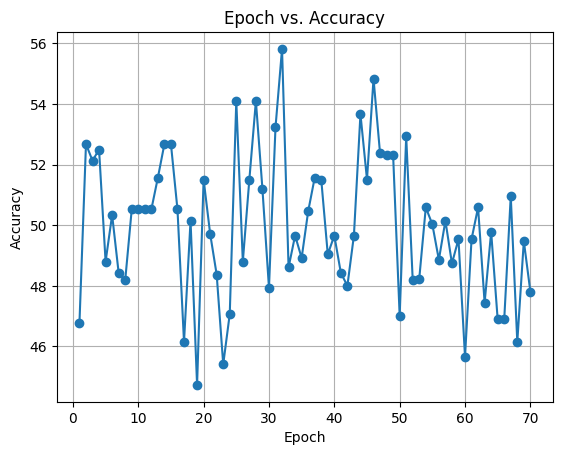

In [6]:
#Accuracy
import matplotlib.pyplot as plt
plt.plot(epoch_list, all_acc, marker='o', linestyle='-')
plt.title('Epoch vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

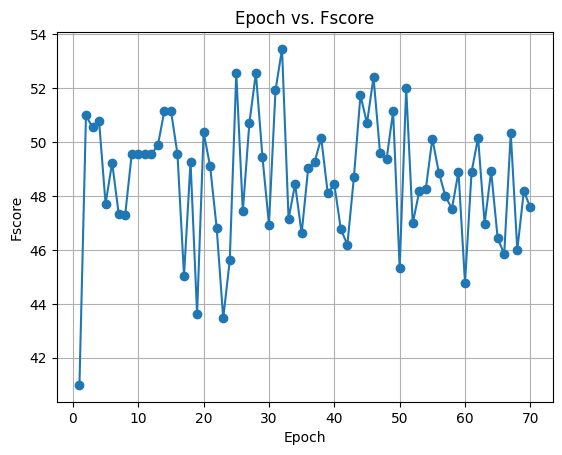

In [7]:
#Fscore
import matplotlib.pyplot as plt
plt.plot(epoch_list, all_fscore, marker='o', linestyle='-')
plt.title('Epoch vs. Fscore')
plt.xlabel('Epoch')
plt.ylabel('Fscore')
plt.grid(True)
plt.show()

train_dailydialogue.py

In [8]:
import numpy as np, argparse, time, pickle, random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
# from dataloader import DailyDialogueDataset2
# from model import MaskedNLLLoss, LSTMModel, GRUModel, DialogRNNModel, DialogueGCNModel, DialogueGCN_DailyModel
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, \
    precision_recall_fscore_support, precision_score, recall_score

# We use seed = 100 for reproduction of the results reported in the paper.
seed = 100


def seed_everything(seed=seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


def get_train_valid_sampler(trainset, valid=0.1):
    size = len(trainset)
    idx = list(range(size))
    split = int(valid * size)
    return SubsetRandomSampler(idx[split:]), SubsetRandomSampler(idx[:split])


def get_DailyDialogue_loaders(path, batch_size, num_workers=0, pin_memory=False):
    trainset = DailyDialogueDataset2('train', path)
    testset = DailyDialogueDataset2('test', path)
    validset = DailyDialogueDataset2('valid', path)

    train_loader = DataLoader(trainset,
                              batch_size=batch_size,
                              collate_fn=trainset.collate_fn,
                              num_workers=num_workers,
                              pin_memory=pin_memory)

    valid_loader = DataLoader(validset,
                              batch_size=batch_size,
                              collate_fn=validset.collate_fn,
                              num_workers=num_workers,
                              pin_memory=pin_memory)

    test_loader = DataLoader(testset,
                             batch_size=batch_size,
                             collate_fn=testset.collate_fn,
                             num_workers=num_workers,
                             pin_memory=pin_memory)

    return train_loader, valid_loader, test_loader


def train_or_eval_model(model, loss_function, dataloader, epoch, optimizer=None, train=False):
    losses, preds, labels, masks = [], [], [], []
    alphas, alphas_f, alphas_b, vids = [], [], [], []
    max_sequence_len = []

    assert not train or optimizer != None
    if train:
        model.train()
    else:
        model.eval()

    seed_everything()
    for data in dataloader:
        if train:
            optimizer.zero_grad()

        # import ipdb;ipdb.set_trace()
        textf, qmask, umask, label = [d.cuda() for d in data[:-1]] if cuda else data[:-1]
        max_sequence_len.append(textf.size(0))

        log_prob, alpha, alpha_f, alpha_b, _ = model(textf, qmask, umask)  # seq_len, batch, n_classes
        lp_ = log_prob.transpose(0, 1).contiguous().view(-1, log_prob.size()[2])  # batch*seq_len, n_classes
        labels_ = label.view(-1)  # batch*seq_len
        loss = loss_function(lp_, labels_, umask)

        pred_ = torch.argmax(lp_, 1)  # batch*seq_len
        preds.append(pred_.data.cpu().numpy())
        labels.append(labels_.data.cpu().numpy())
        masks.append(umask.view(-1).cpu().numpy())

        losses.append(loss.item() * masks[-1].sum())
        if train:
            loss.backward()
            if args.tensorboard:
                for param in model.named_parameters():
                    writer.add_histogram(param[0], param[1].grad, epoch)
            optimizer.step()
        else:
            alphas += alpha
            alphas_f += alpha_f
            alphas_b += alpha_b
            vids += data[-1]

    if preds != []:
        preds = np.concatenate(preds)
        labels = np.concatenate(labels)
        masks = np.concatenate(masks)
    else:
        return float('nan'), float('nan'), [], [], [], float('nan'), []

    avg_loss = round(np.sum(losses) / np.sum(masks), 4)
    avg_accuracy = round(accuracy_score(labels, preds, sample_weight=masks) * 100, 2)
    avg_fscore = round(f1_score(labels, preds, sample_weight=masks, average='weighted') * 100, 2)

    return avg_loss, avg_accuracy, labels, preds, masks, avg_fscore, [alphas, alphas_f, alphas_b, vids]

# Only modified graph model
def train_or_eval_graph_model(model, loss_function, dataloader, epoch, cuda, optimizer=None, train=False):
    losses, preds, labels = [], [], []
    scores, vids = [], []

    ei, et, en, el = torch.empty(0).type(torch.LongTensor), torch.empty(0).type(torch.LongTensor), torch.empty(0), []

    # if torch.cuda.is_available():
    if cuda:
        ei, et, en = ei.cuda(), et.cuda(), en.cuda()

    assert not train or optimizer != None
    if train:
        model.train()
    else:
        model.eval()

    seed_everything()
    for data in dataloader:
        if train:
            optimizer.zero_grad()

        # textf, visuf, acouf, qmask, umask, label = [d.cuda() for d in data[:-1]] if cuda else data[:-1]
#         textf, qmask, umask, label = [d.cuda() for d in data[:-1]] if cuda else data[:-1]
        textf, qmask, umask, label = [d.cuda() for d in data[:-1]]
        

        
        lengths = [(umask[j] == 1).nonzero().tolist()[-1][0] + 1 for j in range(len(umask))]

        log_prob, e_i, e_n, e_t, e_l = model(textf, qmask, umask, lengths)

        label = torch.cat([label[j][:lengths[j]] for j in range(len(label))])
        loss = loss_function(log_prob, label)

        ei = torch.cat([ei, e_i], dim=1)
        et = torch.cat([et, e_t])
        en = torch.cat([en, e_n])
        el += e_l

        preds.append(torch.argmax(log_prob, 1).cpu().numpy())
        labels.append(label.cpu().numpy())
        losses.append(loss.item())

        if train:
            loss.backward()
            if args.tensorboard:
                for param in model.named_parameters():
                    writer.add_histogram(param[0], param[1].grad, epoch)
            optimizer.step()

    if preds != []:
        preds = np.concatenate(preds)
        labels = np.concatenate(labels)
    else:
        return float('nan'), float('nan'), [], [], float('nan'), [], [], [], [], []

    vids += data[-1]
    ei = ei.data.cpu().numpy()
    et = et.data.cpu().numpy()
    en = en.data.cpu().numpy()
    el = np.array(el)
    labels = np.array(labels)
    preds = np.array(preds)
    vids = np.array(vids)

    avg_loss = round(np.sum(losses) / len(losses), 4)
    avg_accuracy = round(accuracy_score(labels, preds) * 100, 2)
    # Here, You should mask the label 'no_emotion'
    # So you should remember the pre-processing label mapping
    # My 'no_emotion' label matched to '3'
    # Follow the same metric settings in DialogueRNN
    avg_fscore = round(f1_score(labels, preds, average='micro', labels=[0, 1, 2, 4, 5, 6]) * 100, 2)
    # Add precision and recall
    precision = round(precision_score(labels, preds, average='micro', labels=[0, 1, 2, 4, 5, 6]) * 100, 2)
    recall = round(recall_score(labels, preds, average='micro', labels=[0, 1, 2, 4, 5, 6]) * 100, 2)

    return avg_loss, avg_accuracy, labels, preds, avg_fscore, vids, ei, et, en, el, precision, recall


if __name__ == '__main__':

    path = './saved/DailyDialog/'

    parser = argparse.ArgumentParser()

    parser.add_argument('--no-cuda', action='store_true', default=False, help='does not use GPU')

    parser.add_argument('--base-model', default='LSTM', help='base recurrent model, must be one of DialogRNN/LSTM/GRU')

    parser.add_argument('--graph-model', action='store_true', default=True,
                        help='whether to use graph model after recurrent encoding')

    parser.add_argument('--nodal-attention', action='store_true', default=True,
                        help='whether to use nodal attention in graph model: Equation 4,5,6 in Paper')

    parser.add_argument('--windowp', type=int, default=10,
                        help='context window size for constructing edges in graph model for past utterances')

    parser.add_argument('--windowf', type=int, default=10,
                        help='context window size for constructing edges in graph model for future utterances')

    parser.add_argument('--lr', type=float, default=0.0001, metavar='LR', help='learning rate')

    parser.add_argument('--l2', type=float, default=0.00001, metavar='L2', help='L2 regularization weight')

    parser.add_argument('--rec-dropout', type=float, default=0.1, metavar='rec_dropout', help='rec_dropout rate')

    parser.add_argument('--dropout', type=float, default=0.5, metavar='dropout', help='dropout rate')

    parser.add_argument('--batch-size', type=int, default=1, metavar='BS', help='batch size')

    parser.add_argument('--epochs', type=int, default=70, metavar='E', help='number of epochs')

    parser.add_argument('--class-weight', action='store_true', default=False, help='use class weights')

    parser.add_argument('--active-listener', action='store_true', default=False, help='active listener')

    parser.add_argument('--attention', default='gat', help='Attention type in DialogRNN model')

    parser.add_argument('--tensorboard', action='store_true', default=False, help='Enables tensorboard log')

#     args = parser.parse_args()
    args, unknown = parser.parse_known_args()
    print(args)

    args.cuda = torch.cuda.is_available() and not args.no_cuda
    if args.cuda:
        print('Running on GPU')
    else:
        print('Running on CPU')

    if args.tensorboard:
        from tensorboardX import SummaryWriter

        writer = SummaryWriter()

    n_classes = 7
    cuda = args.cuda
    n_epochs = args.epochs
    batch_size = args.batch_size
    # change D_m into
    D_m = 250
    D_g = 150
    D_p = 150
    D_e = 150
    D_h = 100
    D_a = 100
    graph_h = 150
    kernel_sizes = [3, 4, 5]
    glv_pretrained = np.load(open('/kaggle/working/glv_embedding_matrix', 'rb'), allow_pickle=True)
    vocab_size, embedding_dim = glv_pretrained.shape
    if args.graph_model:
        seed_everything()

        model = DialogueGCNModel(args.base_model,
                                       D_m, D_g, D_p, D_e, D_h, D_a, graph_h,
                                       n_speakers=2,
                                       max_seq_len=110,
                                       window_past=args.windowp,
                                       window_future=args.windowf,
                                       n_classes=n_classes,
                                       listener_state=args.active_listener,
                                       context_attention=args.attention,
                                       dropout=args.dropout,
                                       nodal_attention=args.nodal_attention,
                                       no_cuda=args.no_cuda
                                       )
        

        print('Graph NN with', args.base_model, 'as base model.')
        name = 'Graph'

    else:
        if args.base_model == 'DialogRNN':
            model = DialogRNNModel(D_m, D_g, D_p, D_e, D_h, D_a,
                                   n_classes=n_classes,
                                   listener_state=args.active_listener,
                                   context_attention=args.attention,
                                   dropout_rec=args.rec_dropout,
                                   dropout=args.dropout)

            print('Basic Dialog RNN Model.')


        elif args.base_model == 'GRU':
            model = GRUModel(D_m, D_e, D_h,
                             n_classes=n_classes,
                             dropout=args.dropout)

            print('Basic GRU Model.')


        elif args.base_model == 'LSTM':
            print(D_m)
            model = LSTMModel(250, D_e, D_h,
                              n_classes=n_classes,
                              dropout=args.dropout)

            print('Basic LSTM Model.')

        else:
            print('Base model must be one of DialogRNN/LSTM/GRU/Transformer')
            raise NotImplementedError

        name = 'Base'
  
    if cuda:
        model.cuda()

    # for daily_dialog_bert2.pkl
    # In the pre-processing, you should remember the label mapping.
    # Here is my label mapping and weights for the dailydialogue
    loss_weights = torch.FloatTensor([1 / 0.0017,
                                      1 / 0.0034,
                                      1 / 0.1251,
                                      1 / 0.831,
                                      1 / 0.0099,
                                      1 / 0.0177,
                                      1 / 0.0112])
    if args.class_weight:
        if args.graph_model:
            loss_function = nn.NLLLoss(loss_weights.cuda() if cuda else loss_weights)
        else:
            loss_function = MaskedNLLLoss(loss_weights.cuda() if cuda else loss_weights)
    else:
        if args.graph_model:
            loss_function = nn.NLLLoss()
        else:
            loss_function = MaskedNLLLoss()

    optimizer = optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.l2)

    if args.class_weight:
        train_loader, valid_loader, test_loader = get_DailyDialogue_loaders('/kaggle/working/daily_dialogue2.pkl',
                                                                            batch_size=batch_size, num_workers=0)
    else:
        train_loader, valid_loader, test_loader = get_DailyDialogue_loaders('/kaggle/working/daily_dialogue2.pkl',
                                                                            batch_size=batch_size, num_workers=0)
    best_fscore, best_loss, best_label, best_pred, best_mask = None, None, None, None, None
    all_fscore, all_acc, all_loss = [], [], []
    all_precision, all_recall = [], []
    epoch_list=[]
    for e in range(n_epochs):
        start_time = time.time()

        if args.graph_model:
            train_loss, train_acc, _, _, train_fscore, _, _, _, _, _, train_precision, train_recall = train_or_eval_graph_model(
                model, loss_function, train_loader, e, cuda, optimizer, True)
            valid_loss, valid_acc, _, _, valid_fscore, _, _, _, _, _, valid_precision, valid_recall = train_or_eval_graph_model(
                model, loss_function, valid_loader, e, cuda)
            test_loss, test_acc, test_label, test_pred, test_fscore, _, _, _, _, _, test_precision, test_recall = train_or_eval_graph_model(
                model, loss_function, test_loader, e, cuda)
            all_fscore.append(test_fscore)
            all_precision.append(test_precision)
            all_recall.append(test_recall)
            all_acc.append(test_acc)
            epoch_list.append(e+1)
            # torch.save({'model_state_dict': model.state_dict()}, path + name + args.base_model + '_' + str(e) + '.pkl')


        else:
            train_loss, train_acc, _, _, _, train_fscore, _ = train_or_eval_model(model, loss_function, train_loader, e,
                                                                                  optimizer, True)
            valid_loss, valid_acc, _, _, _, valid_fscore, _ = train_or_eval_model(model, loss_function, valid_loader, e)
            test_loss, test_acc, test_label, test_pred, test_mask, test_fscore, attentions = train_or_eval_model(model,
                                                                                                                 loss_function,
                                                                                                                 test_loader,
                                                                                                                 e)
            all_fscore.append(test_fscore)
            all_acc.append(test_acc)
            # torch.save({'model_state_dict': model.state_dict()}, path + name + args.base_model + '_' + str(e) + '.pkl')

        if args.tensorboard:
            writer.add_scalar('test: accuracy/loss', test_acc / test_loss, e)
            writer.add_scalar('train: accuracy/loss', train_acc / train_loss, e)

        print(
            'epoch: {}, train_loss: {}, train_acc: {}, train_fscore: {}, valid_loss: {}, valid_acc: {}, valid_fscore: {}, test_loss: {}, test_acc: {}, test_fscore: {}, time: {} sec'. \
            format(e + 1, train_loss, train_acc, train_fscore,  valid_loss, valid_acc,
                   valid_fscore,  test_loss, test_acc, test_fscore,  round(time.time() - start_time, 2)))

    if args.tensorboard:
        writer.close()

    print('Test performance..')
    index_max = all_fscore.index(max(all_fscore))
    print('F-Score:', all_fscore[index_max])
    print('Accuracy',all_acc[index_max])

Namespace(no_cuda=False, base_model='LSTM', graph_model=True, nodal_attention=True, windowp=10, windowf=10, lr=0.0001, l2=1e-05, rec_dropout=0.1, dropout=0.5, batch_size=1, epochs=70, class_weight=False, active_listener=False, attention='gat', tensorboard=False)
Running on GPU
Graph NN with LSTM as base model.


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 1, train_loss: 0.6847, train_acc: 82.64, train_fscore: 0.08, valid_loss: 0.5317, valid_acc: 88.09, valid_fscore: 0.0, test_loss: 0.6711, test_acc: 81.67, test_fscore: 0.0, time: 493.61 sec


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 2, train_loss: 0.625, train_acc: 82.76, train_fscore: 0.17, valid_loss: 0.5346, valid_acc: 88.09, valid_fscore: 0.0, test_loss: 0.6705, test_acc: 81.67, test_fscore: 0.0, time: 488.42 sec


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 3, train_loss: 0.5711, train_acc: 82.97, train_fscore: 6.71, valid_loss: 0.5484, valid_acc: 88.09, valid_fscore: 0.0, test_loss: 0.6888, test_acc: 81.67, test_fscore: 0.0, time: 489.91 sec
epoch: 4, train_loss: 0.5096, train_acc: 84.0, train_fscore: 21.07, valid_loss: 0.5618, valid_acc: 88.03, valid_fscore: 0.0, test_loss: 0.709, test_acc: 81.71, test_fscore: 1.26, time: 487.2 sec
epoch: 5, train_loss: 0.4616, train_acc: 84.91, train_fscore: 30.89, valid_loss: 0.5825, valid_acc: 87.89, valid_fscore: 2.39, test_loss: 0.7407, test_acc: 81.43, test_fscore: 1.91, time: 486.58 sec
epoch: 6, train_loss: 0.4211, train_acc: 85.41, train_fscore: 36.32, valid_loss: 0.5936, valid_acc: 87.28, valid_fscore: 0.77, test_loss: 0.7648, test_acc: 81.34, test_fscore: 4.11, time: 487.05 sec
epoch: 7, train_loss: 0.3927, train_acc: 85.76, train_fscore: 40.34, valid_loss: 0.6071, valid_acc: 87.4, valid_fscore: 3.05, test_loss: 0.7676, test_acc: 81.34, test_fscore: 3.6, time: 482.54 sec
epoch: 8, trai

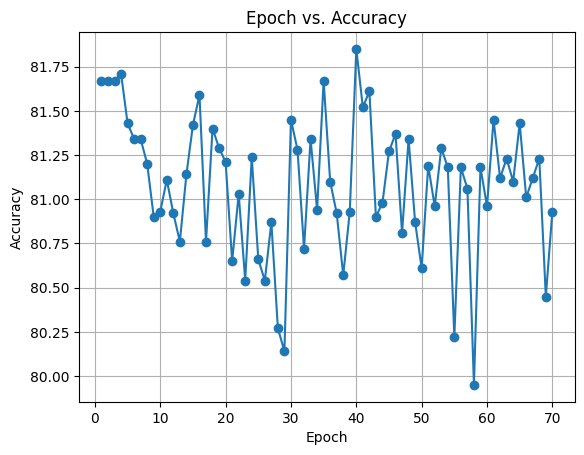

In [9]:
#Accuracy
import matplotlib.pyplot as plt
plt.plot(epoch_list, all_acc, marker='o', linestyle='-')
plt.title('Epoch vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

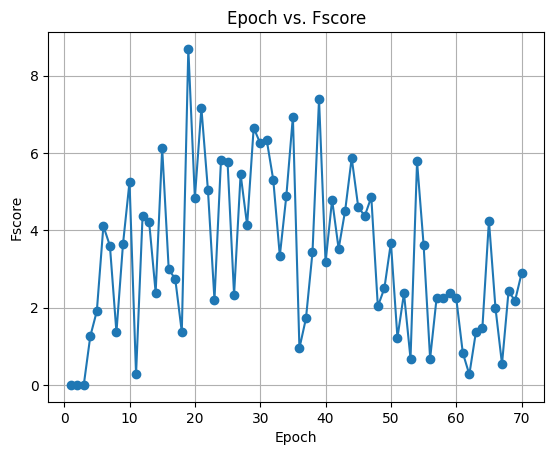

In [10]:
#Fscore
import matplotlib.pyplot as plt
plt.plot(epoch_list, all_fscore, marker='o', linestyle='-')
plt.title('Epoch vs. Fscore')
plt.xlabel('Epoch')
plt.ylabel('Fscore')
plt.grid(True)
plt.show()

In [11]:
torch.save(model.state_dict(), '/kaggle/working/model.pt')

In [12]:
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def preprocess_text(x):
    for punct in '"!&?.,}-/<>#$%\()*+:;=?@[\\]^_`|\~':
        x = x.replace(punct, ' ')

    x = ' '.join(x.split())
    x = x.lower()

    return x

def create_sample_data():
    
    sample_data = [
        {"dialogue": [{"emotion": "no_emotion","act": "question","text": "Good morning , sir . Is there a bank near here ?"},
                      { "emotion": "no_emotion","act": "inform","text": "There is one . 5 blocks away from here ?"},
                      {"emotion": "no_emotion", "act": "directive","text": "Well , that's too far . Can you change some money for me ?"},
                      {"emotion": "no_emotion","act": "question","text": "Surely , of course . What kind of currency have you got ?"}]}
        
    ]

    sentences, act_labels, emotion_labels, speakers, conv_id, utt_id = [], [], [], [], [], []

    for c_id, item in enumerate(sample_data):
        for u_id, dialog in enumerate(item['dialogue']):
            sentences.append(dialog['text'])
            act_labels.append(dialog['act'])
            emotion_labels.append(dialog['emotion'])
            conv_id.append('sample_c' + str(c_id))
            utt_id.append('sample_c' + str(c_id) + '_u' + str(u_id))
            speakers.append(str(u_id % 2))

    data = pd.DataFrame(sentences, columns=['sentence'])
    data['sentence'] = data['sentence'].apply(lambda x: preprocess_text(x))
    data['act_label'] = act_labels
    data['emotion_label'] = emotion_labels
    data['speaker'] = speakers
    data['conv_id'] = conv_id
    data['utt_id'] = utt_id

    return data

def encode_labels(encoder, l):
    return encoder[l]

if __name__ == '__main__':

    sample_data = create_sample_data()

    all_act_labels, all_emotion_labels = set(sample_data['act_label']), set(sample_data['emotion_label'])
    act_label_encoder, emotion_label_encoder, act_label_decoder, emotion_label_decoder = {}, {}, {}, {}

    for i, label in enumerate(all_act_labels):
        act_label_encoder[label] = i
        act_label_decoder[i] = label

    for i, label in enumerate(all_emotion_labels):
        emotion_label_encoder[label] = i
        emotion_label_decoder[i] = label

    pickle.dump(act_label_encoder, open('act_label_encoder.pkl', 'wb'))
    pickle.dump(act_label_decoder, open('act_label_decoder.pkl', 'wb'))
    pickle.dump(emotion_label_encoder, open('emotion_label_encoder.pkl', 'wb'))
    pickle.dump(emotion_label_decoder, open('emotion_label_decoder.pkl', 'wb'))

    sample_data['encoded_act_label'] = sample_data['act_label'].map(lambda x: encode_labels(act_label_encoder, x))
    sample_data['encoded_emotion_label'] = sample_data['emotion_label'].map(
        lambda x: encode_labels(emotion_label_encoder, x))


    all_text = list(sample_data['sentence'])
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(all_text)
    pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))


    sample_sequence = tokenizer.texts_to_sequences(list(sample_data['sentence']))

    sample_data['sentence_length'] = [len(item) for item in sample_sequence]

    max_num_tokens = 250

    sample_sequence = pad_sequences(sample_sequence, maxlen=max_num_tokens, padding='post')

    sample_data['sequence'] = list(sample_sequence)
    convSpeakers, convInputSequence, convInputMaxSequenceLength, convActLabels, convEmotionLabels = {}, {}, {}, {}, {}
    conv_ids = set(sample_data['conv_id'])
    all_data = sample_data

    print('Preparing sample dataset...')

    for item in conv_ids:
        df = all_data[all_data['conv_id'] == item]

        convSpeakers[item] = list(df['speaker'])
        convInputSequence[item] = list(df['sequence'])
        convInputMaxSequenceLength[item] = max(list(df['sentence_length']))
        convActLabels[item] = list(df['encoded_act_label'])
        convEmotionLabels[item] = list(df['encoded_emotion_label'])

    pickle.dump([convSpeakers, convInputSequence, convInputMaxSequenceLength, convActLabels, convEmotionLabels,
                 conv_ids,conv_ids,conv_ids], open('sample_dialogue.pkl', 'wb'))

    print('Sample dataset prepared and saved.')

Preparing sample dataset...
Sample dataset prepared and saved.


In [13]:
sample_dataset = DailyDialogueDataset2(split='test', path='/kaggle/working/sample_dialogue.pkl')  # Provide empty path as it's not required for this case

sample_loader = DataLoader(sample_dataset,
                             batch_size=16,
                             collate_fn=sample_dataset.collate_fn,
                             num_workers=0,
                             pin_memory=False)



In [14]:
import torch
import torch.nn as nn


model_path = '/kaggle/working/model.pt' 


model_state_dict = torch.load(model_path)


model = DialogueGCNModel(args.base_model,
                                       D_m, D_g, D_p, D_e, D_h, D_a, graph_h,
                                       n_speakers=2,
                                       max_seq_len=110,
                                       window_past=args.windowp,
                                       window_future=args.windowf,
                                       n_classes=n_classes,
                                       listener_state=args.active_listener,
                                       context_attention=args.attention,
                                       dropout=args.dropout,
                                       nodal_attention=args.nodal_attention,
                                       no_cuda=args.no_cuda
                                       )  


model.load_state_dict(model_state_dict)


loss_function = nn.NLLLoss()  

if cuda:
    model.cuda()


test_loss, test_acc, test_label, test_pred, test_fscore, _, _, _, _, _, test_precision, test_recall= train_or_eval_graph_model(
                model, loss_function, sample_loader, e, cuda)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
for label_index in test_label:
    print(all_emotion_list[label_index])

disgust
disgust
disgust
disgust
